In [56]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import csv
import seaborn
import statsmodels.formula.api as smf
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [57]:
weather = pd.read_csv('../Final_Data/London_weather_data_2011_2014.csv', parse_dates=[0], infer_datetime_format=True)
weather.iloc[:,1:].convert_objects(convert_numeric=True)
weather.columns

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'Datetime', u'Dew_Point_F', u'Humidity',
       u'Temperature_F', u'Wind_Speed_MPH'],
      dtype='object')

In [58]:
weather.index = pd.DatetimeIndex(weather.Datetime)

In [59]:
weather.head()

Unnamed: 0             Datetime  Dew_Point_F  Humidity  \
2011-11-01 01:00:00          0  2011-11-01 01:00:00         51.8      88.0   
2011-11-01 02:00:00          1  2011-11-01 02:00:00         53.6      94.0   
2011-11-01 03:00:00          2  2011-11-01 03:00:00         53.6      88.0   
2011-11-01 04:00:00          3  2011-11-01 04:00:00         53.6      88.0   
2011-11-01 05:00:00          4  2011-11-01 05:00:00         53.6      88.0   

                     Temperature_F  Wind_Speed_MPH  
2011-11-01 01:00:00           55.4             6.9  
2011-11-01 02:00:00           55.4             8.1  
2011-11-01 03:00:00           57.2             9.2  
2011-11-01 04:00:00           57.2             9.2  
2011-11-01 05:00:00           57.2             8.1

In [60]:
# slicing out 2013 data
weather2013 = weather[weather.index.year == 2013]
weather2012 = weather[weather.index.year == 2012]
weather1213 = pd.concat([weather2012, weather2013])

In [61]:
weather1213.head()

Unnamed: 0             Datetime  Dew_Point_F  Humidity  \
2012-01-01 00:00:00       1460  2012-01-01 00:00:00         50.0      88.0   
2012-01-01 01:00:00       1461  2012-01-01 01:00:00         50.0      88.0   
2012-01-01 02:00:00       1462  2012-01-01 02:00:00         51.8      94.0   
2012-01-01 03:00:00       1463  2012-01-01 03:00:00         51.0      92.0   
2012-01-01 04:00:00       1464  2012-01-01 04:00:00         50.0      88.0   

                     Temperature_F  Wind_Speed_MPH  
2012-01-01 00:00:00           53.6            13.8  
2012-01-01 01:00:00           53.6            15.0  
2012-01-01 02:00:00           53.6            13.8  
2012-01-01 03:00:00           53.0            13.8  
2012-01-01 04:00:00           53.6            10.4

In [62]:
energy2013 = pd.read_csv('../Final_Data/energy_final_2013.csv', parse_dates=[0], infer_datetime_format=True)
energy2013.iloc[:,1:].convert_objects(convert_numeric=True)
energy2013.columns

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'DateTime', u'Adversity', u'Affluent', u'Comfortable',
       u'Overall'],
      dtype='object')

In [63]:
energy2012 = pd.read_csv('../Final_Data/energy_final_2012.csv', parse_dates=[0], infer_datetime_format=True)
energy2012.iloc[:,1:].convert_objects(convert_numeric=True)
energy2012.columns

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'DateTime', u'Adversity', u'Affluent', u'Comfortable',
       u'Overall'],
      dtype='object')

In [64]:
energy1213 = pd.concat([energy2012, energy2013])
energy1213.head()

Unnamed: 0             DateTime  Adversity  Affluent  Comfortable   Overall
0          0  2012-01-01 00:00:00   0.221192  0.268072     0.190114  0.231749
1          1  2012-01-01 01:00:00   0.616456  0.633311     0.355447  0.550101
2          2  2012-01-01 02:00:00   0.483976  0.570036     0.296605  0.466764
3          3  2012-01-01 03:00:00   0.375616  0.489018     0.236228  0.383123
4          4  2012-01-01 04:00:00   0.324936  0.376808     0.206053  0.312892

In [65]:
energy1213.index = pd.DatetimeIndex(energy1213.DateTime)

In [66]:
energy1213.drop(['Unnamed: 0'], axis=1, inplace=True)

In [67]:
energy1213.columns = [['Datetime', 'Low_Income', 'High_Income', 'Middle_Income', 'Overall']]

In [68]:
energy1213.head()

Datetime  Low_Income  High_Income  \
2012-01-01 00:00:00  2012-01-01 00:00:00    0.221192     0.268072   
2012-01-01 01:00:00  2012-01-01 01:00:00    0.616456     0.633311   
2012-01-01 02:00:00  2012-01-01 02:00:00    0.483976     0.570036   
2012-01-01 03:00:00  2012-01-01 03:00:00    0.375616     0.489018   
2012-01-01 04:00:00  2012-01-01 04:00:00    0.324936     0.376808   

                     Middle_Income   Overall  
2012-01-01 00:00:00       0.190114  0.231749  
2012-01-01 01:00:00       0.355447  0.550101  
2012-01-01 02:00:00       0.296605  0.466764  
2012-01-01 03:00:00       0.236228  0.383123  
2012-01-01 04:00:00       0.206053  0.312892

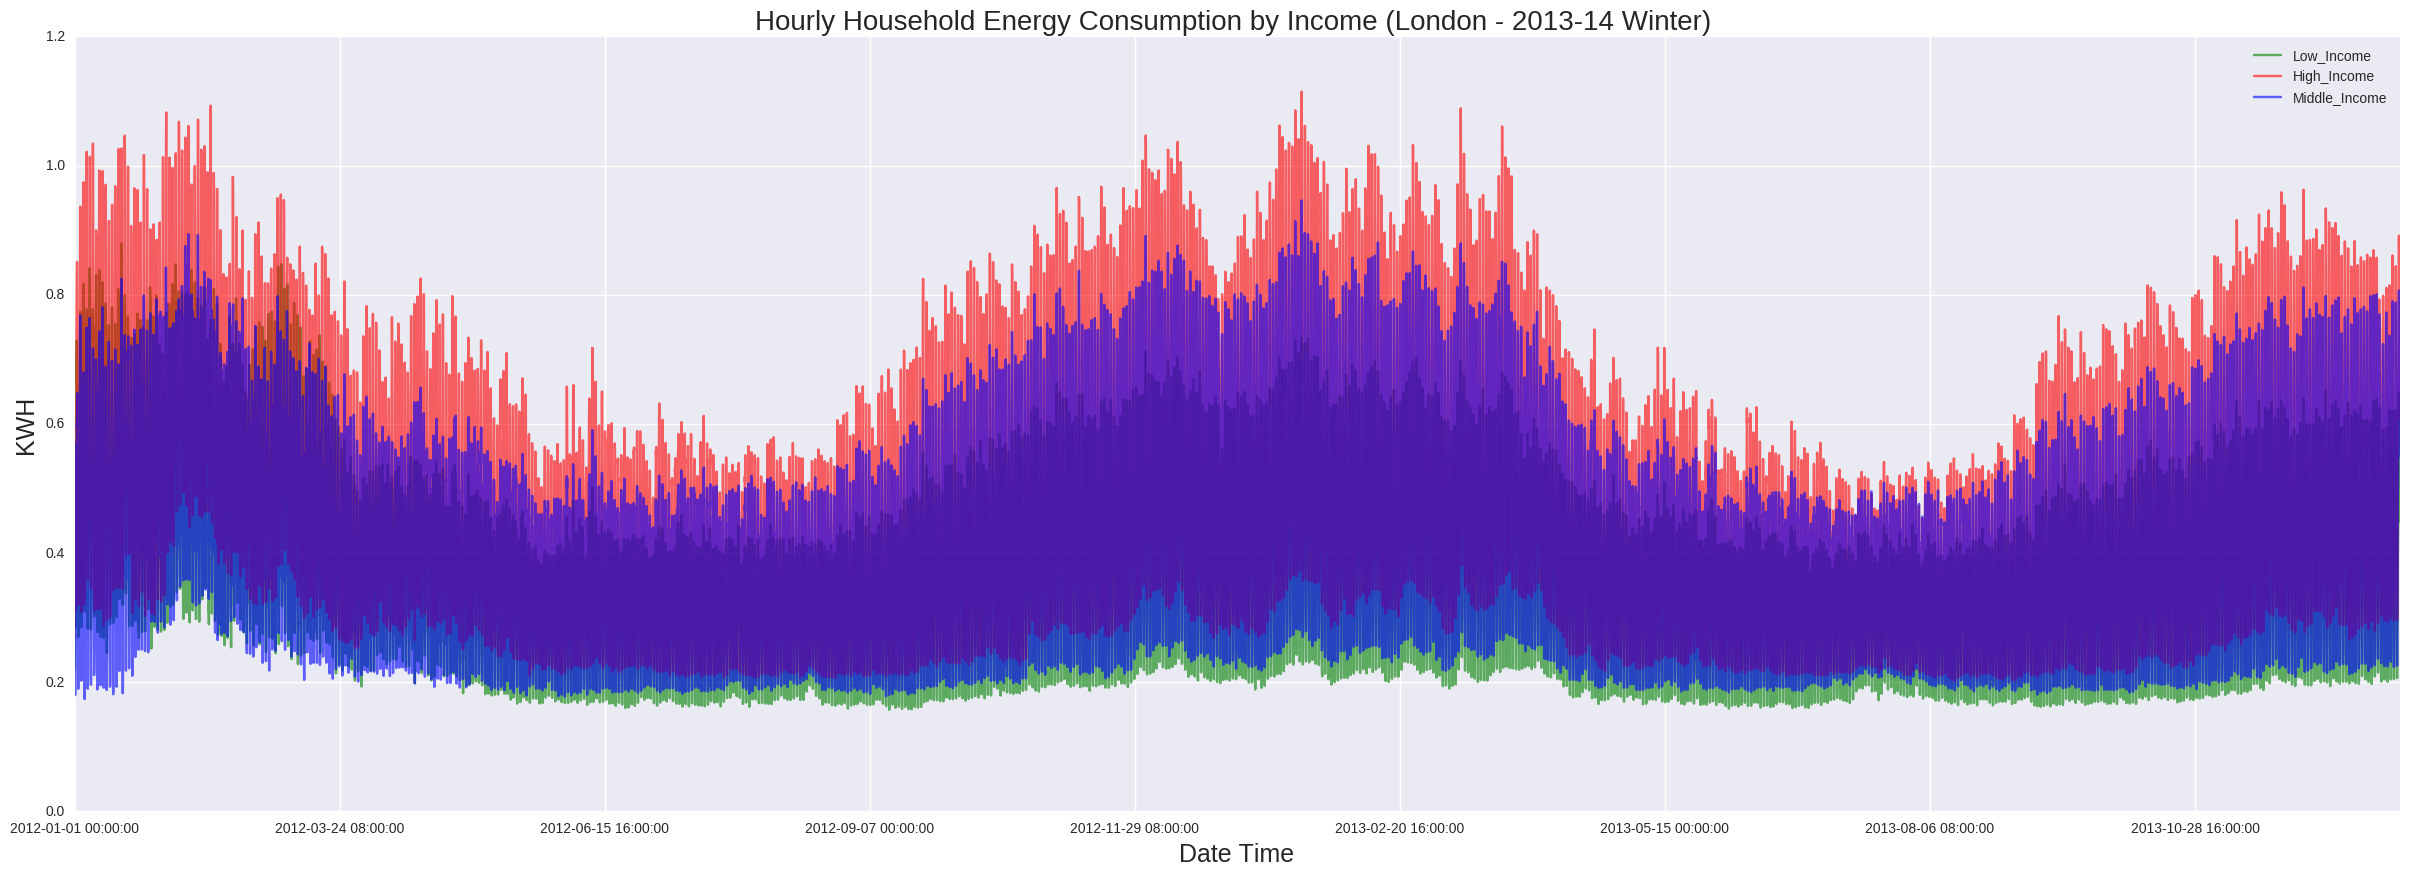

In [69]:
ax = pl.figure(figsize=(30,10)).add_subplot(111)
energy1213.plot(x='Datetime', y='Low_Income', color='Green',alpha=.6, ax=ax)
energy1213.plot(x='Datetime', y='High_Income', color='Red', alpha=.6, ax=ax)
energy1213.plot(x='Datetime', y='Middle_Income', color='Blue',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

In [70]:
final1213 = pd.merge(weather1213, energy1213, on='Datetime')

In [71]:
final2013.head()

Datetime  Dew_Point_F  Humidity  Temperature_F  Wind_Speed_MPH  \
0  2013-01-01 00:00:00         44.6      87.0           48.2             9.2   
1  2013-01-01 01:00:00         44.6      87.0           48.2            10.4   
2  2013-01-01 02:00:00         44.6      93.0           46.4            12.7   
3  2013-01-01 03:00:00         41.0      77.0           46.0             9.2   
4  2013-01-01 04:00:00         41.0      87.0           44.6            10.4   

   Low_Income  High_Income  Middle_Income   Overall  
0    0.214885     0.284734       0.244850  0.250803  
1    0.387206     0.499935       0.426540  0.442699  
2    0.318111     0.429294       0.351710  0.371424  
3    0.263513     0.367315       0.288224  0.311469  
4    0.231694     0.324253       0.253951  0.274516

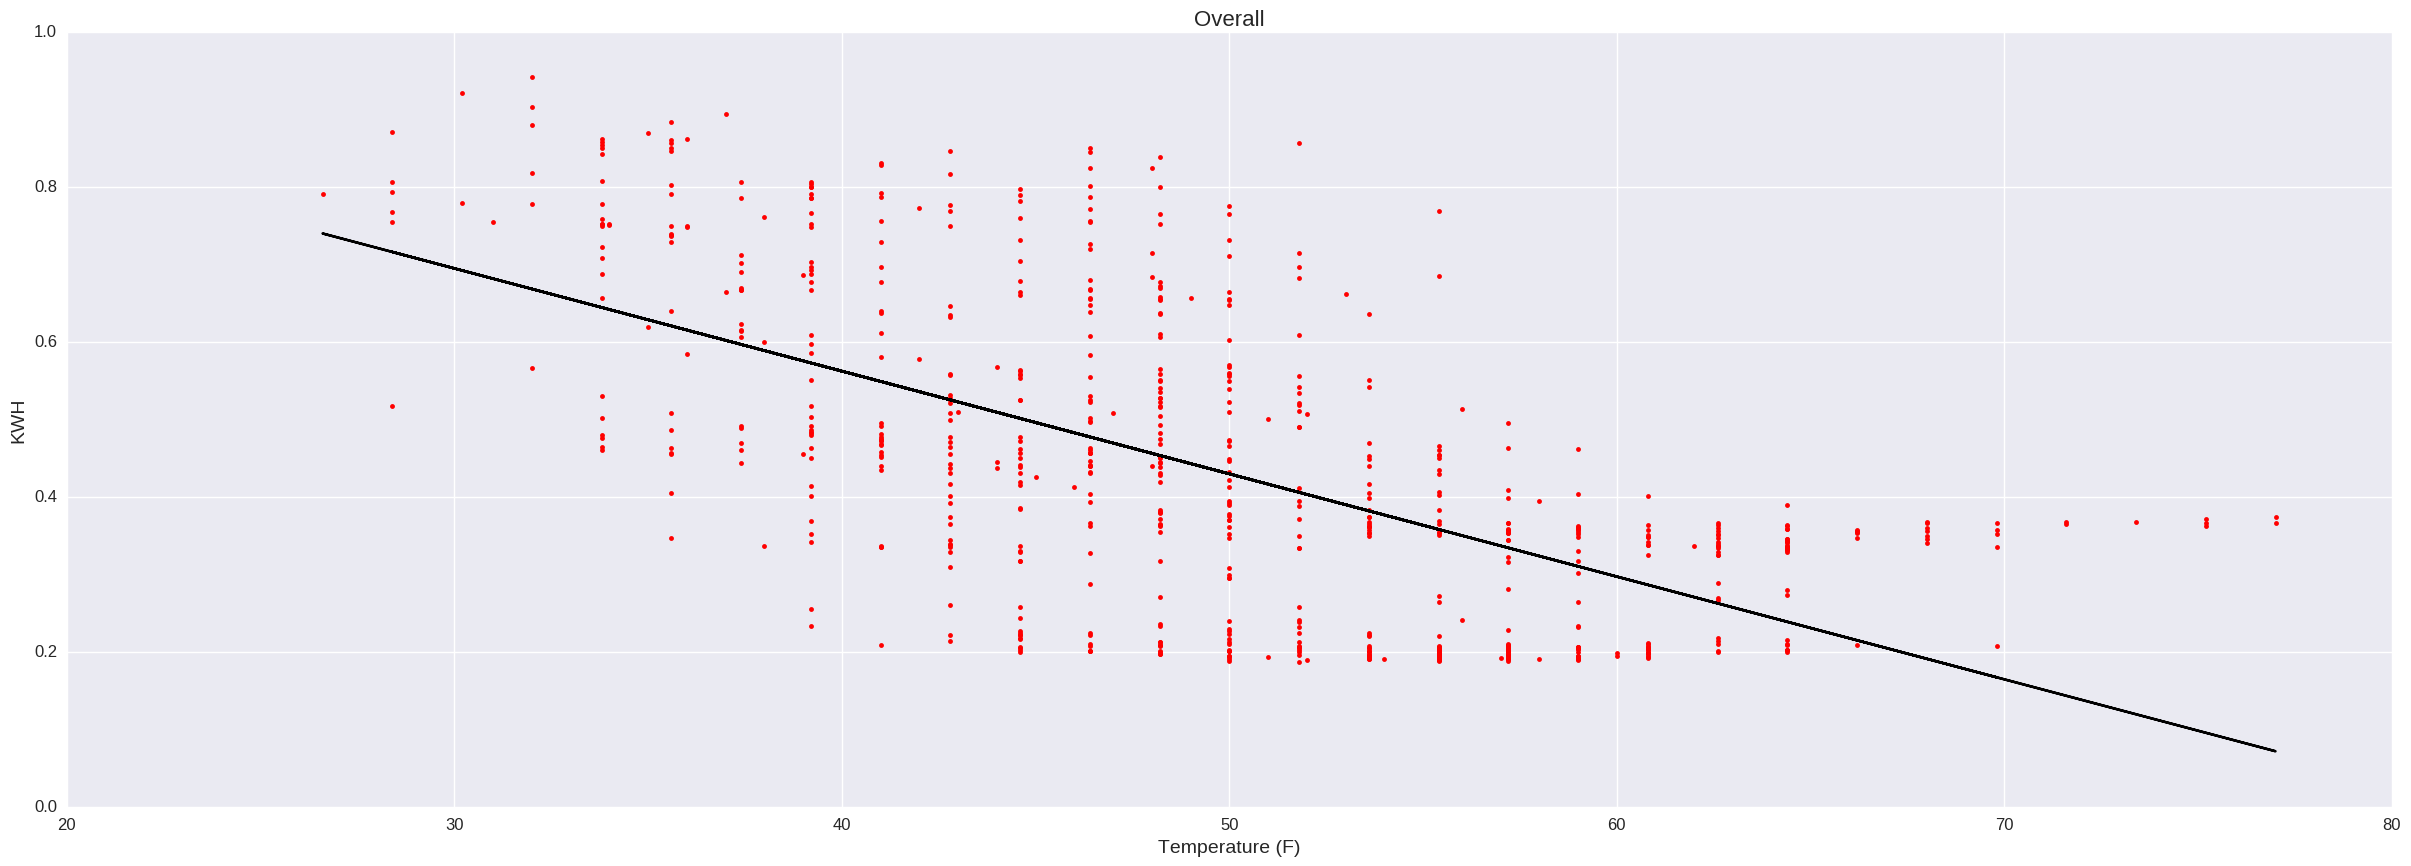

In [72]:
import statsmodels.api as sm
x = np.array(final1213.Temperature_F[17::24])
y = np.array(final1213.Overall[18::24])
lm = sm.OLS(y, sm.add_constant(x)).fit()
ypredict = lm.predict(sm.add_constant(x))
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
        #plot
pl.plot(x, y,'.', color='r')
pl.plot(x, ypredict, 'k')
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
pl.title("Overall", fontsize=16)
pl.ylabel("KWH", fontsize=14)
pl.xlabel("Temperature (F)", fontsize=14)

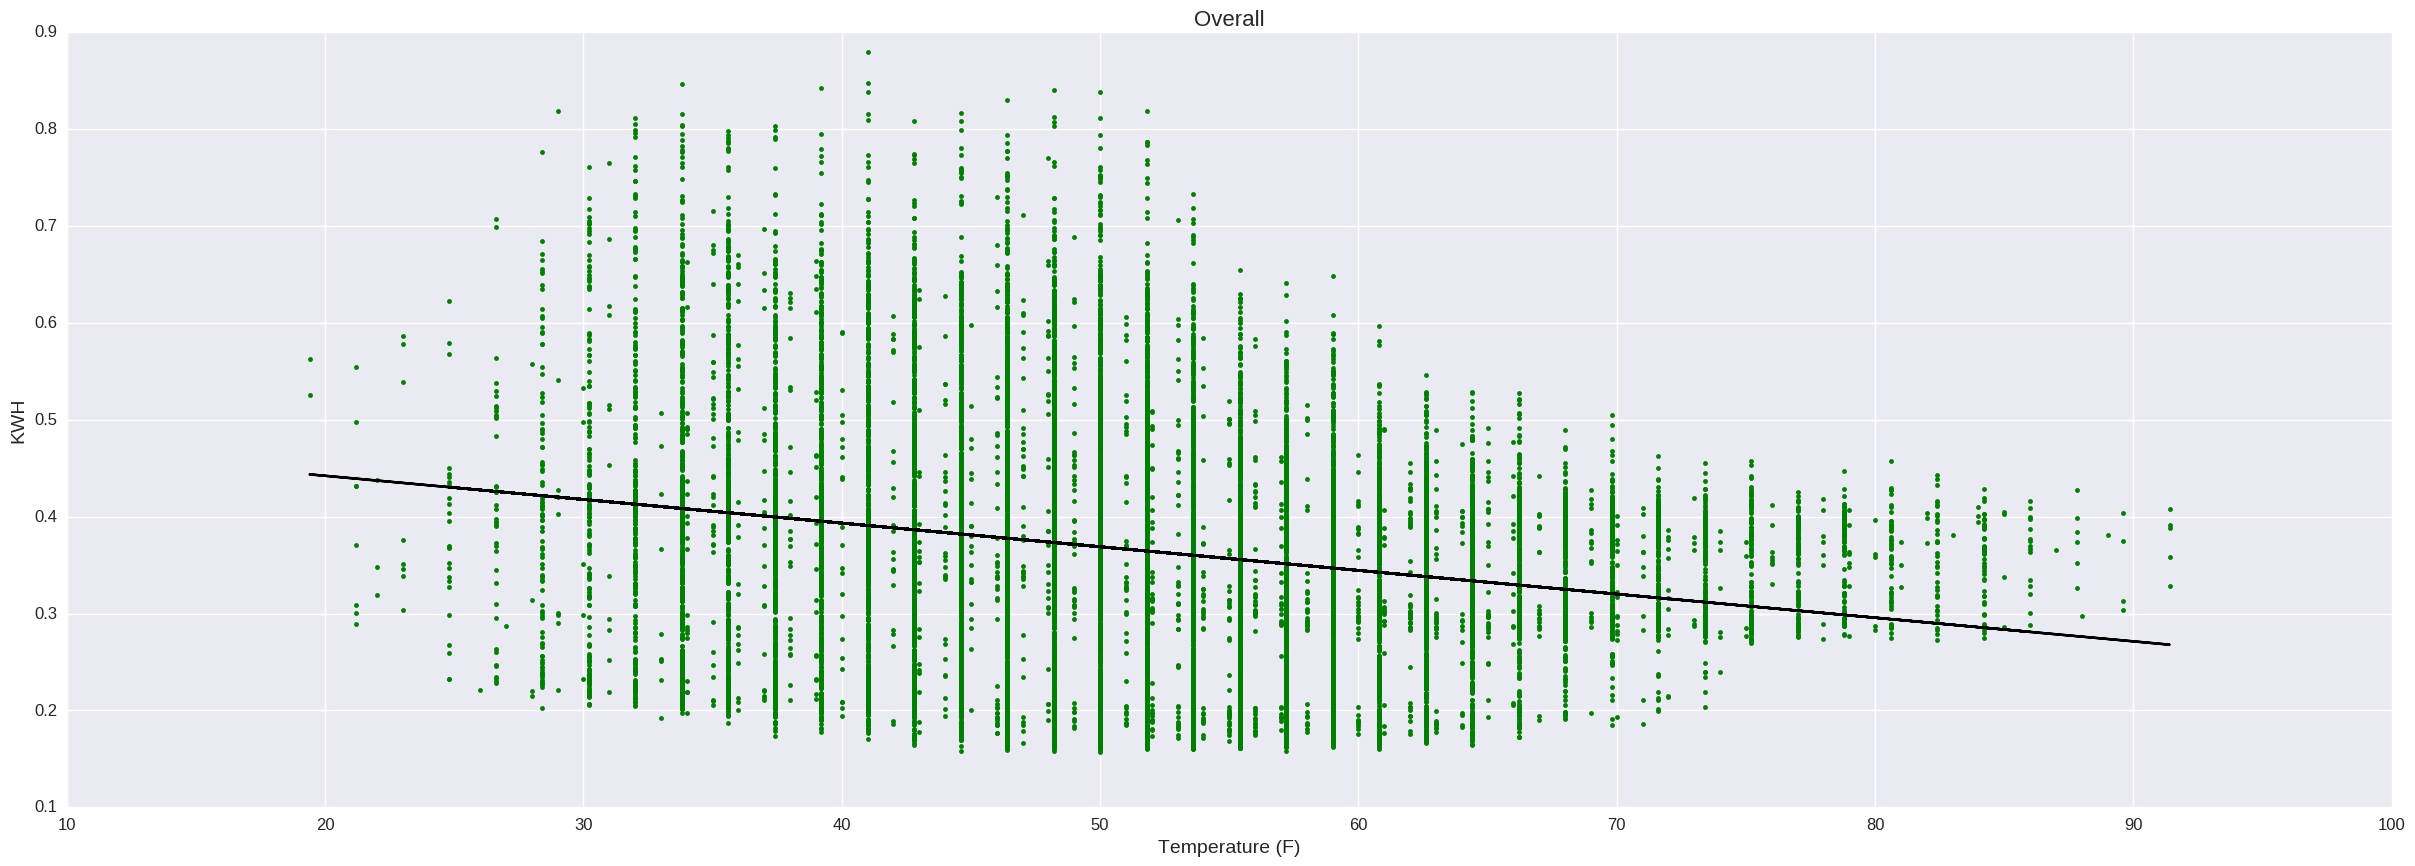

In [73]:
import statsmodels.api as sm
x = np.array(final1213.Temperature_F[:-2])
y = np.array(final1213.Low_Income[2:])
lm = sm.OLS(y, sm.add_constant(x)).fit()
ypredict = lm.predict(sm.add_constant(x))
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
        #plot
pl.plot(x, y,'.', color='g')
pl.plot(x, ypredict, 'k')
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
pl.title("Overall", fontsize=16)
pl.ylabel("KWH", fontsize=14)
pl.xlabel("Temperature (F)", fontsize=14)

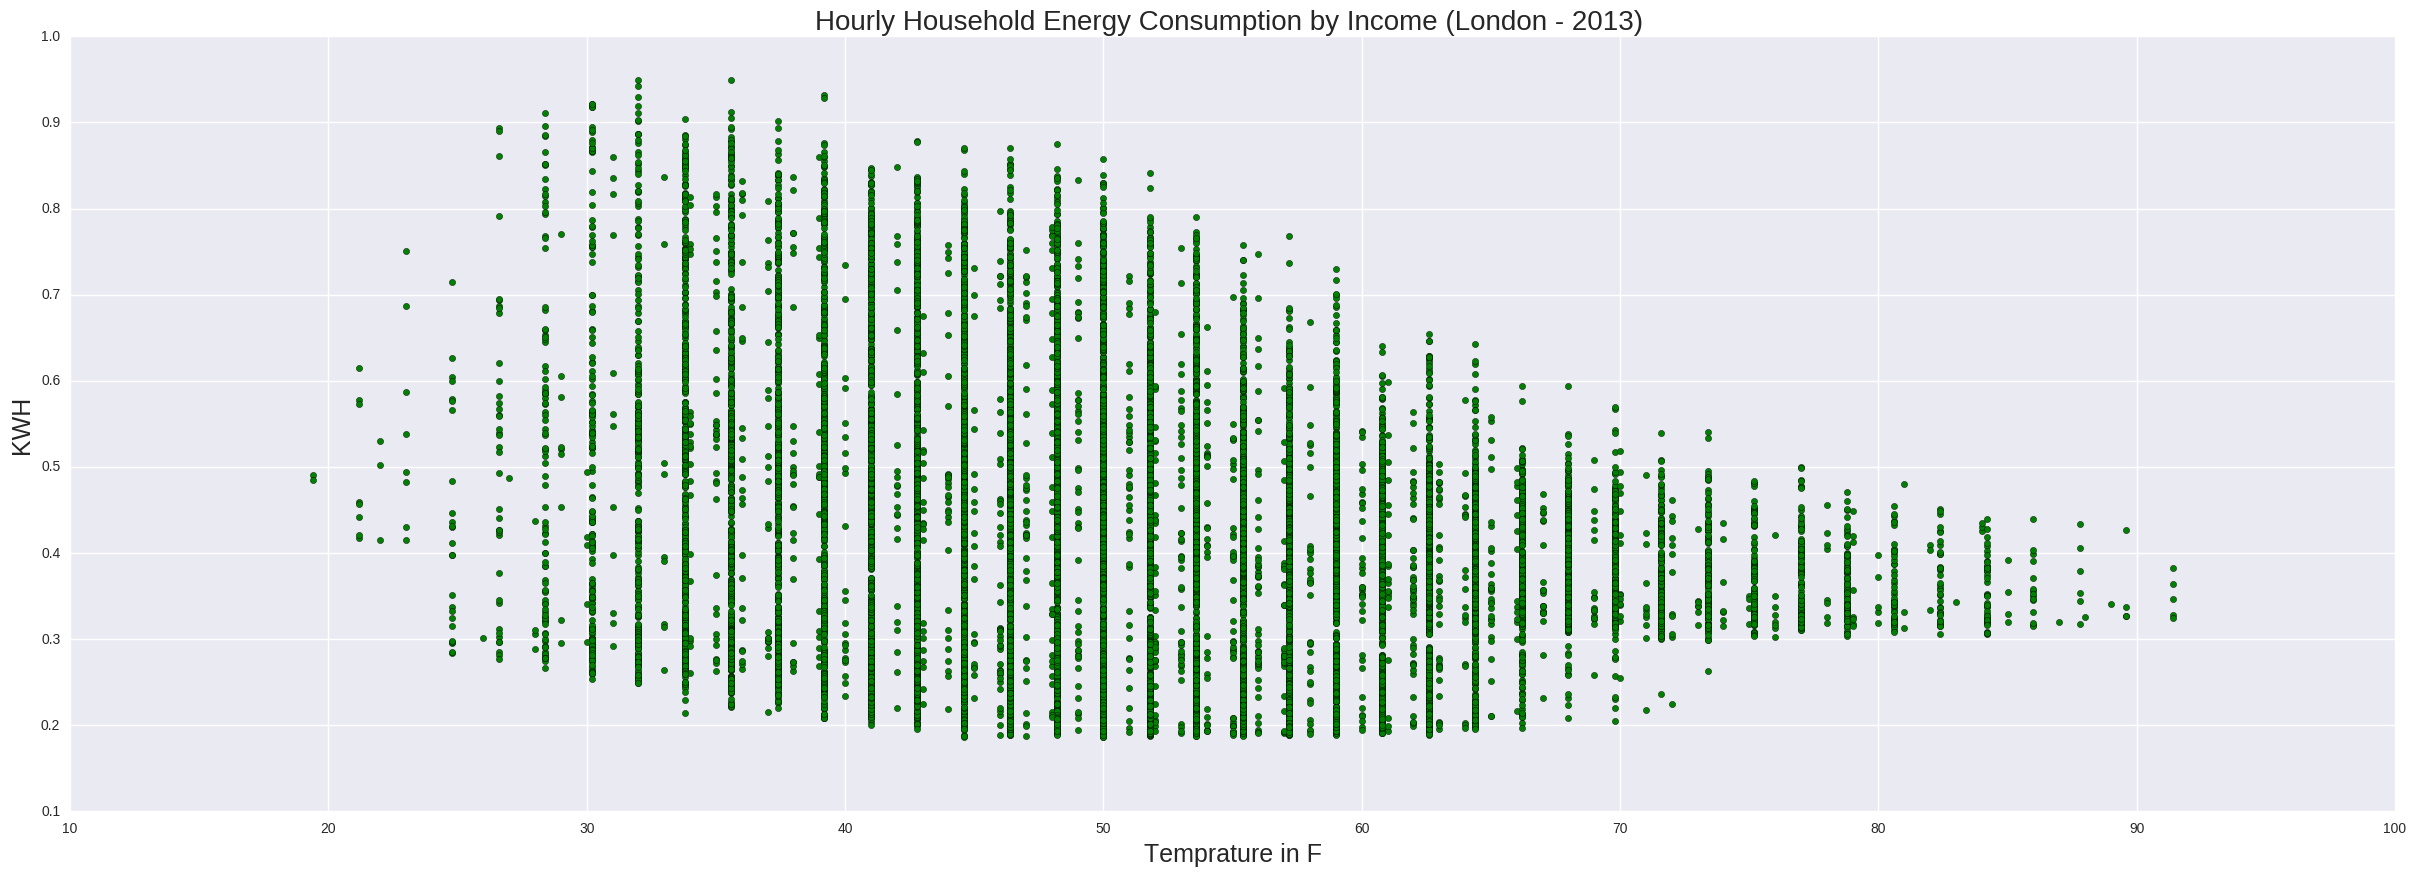

In [74]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
#ax2 = ax1.twinx()
final1213.plot(kind='scatter', x='Temperature_F', y='Overall', color='Green',alpha=1, ax=ax1)
#final2013.plot(x='index', y='Low_Income', color='Green',alpha=.2, ax=ax1)
#final2013.plot(x='index', y='High_Income', color='Red', alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Middle_Income', color='Blue',alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
#pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

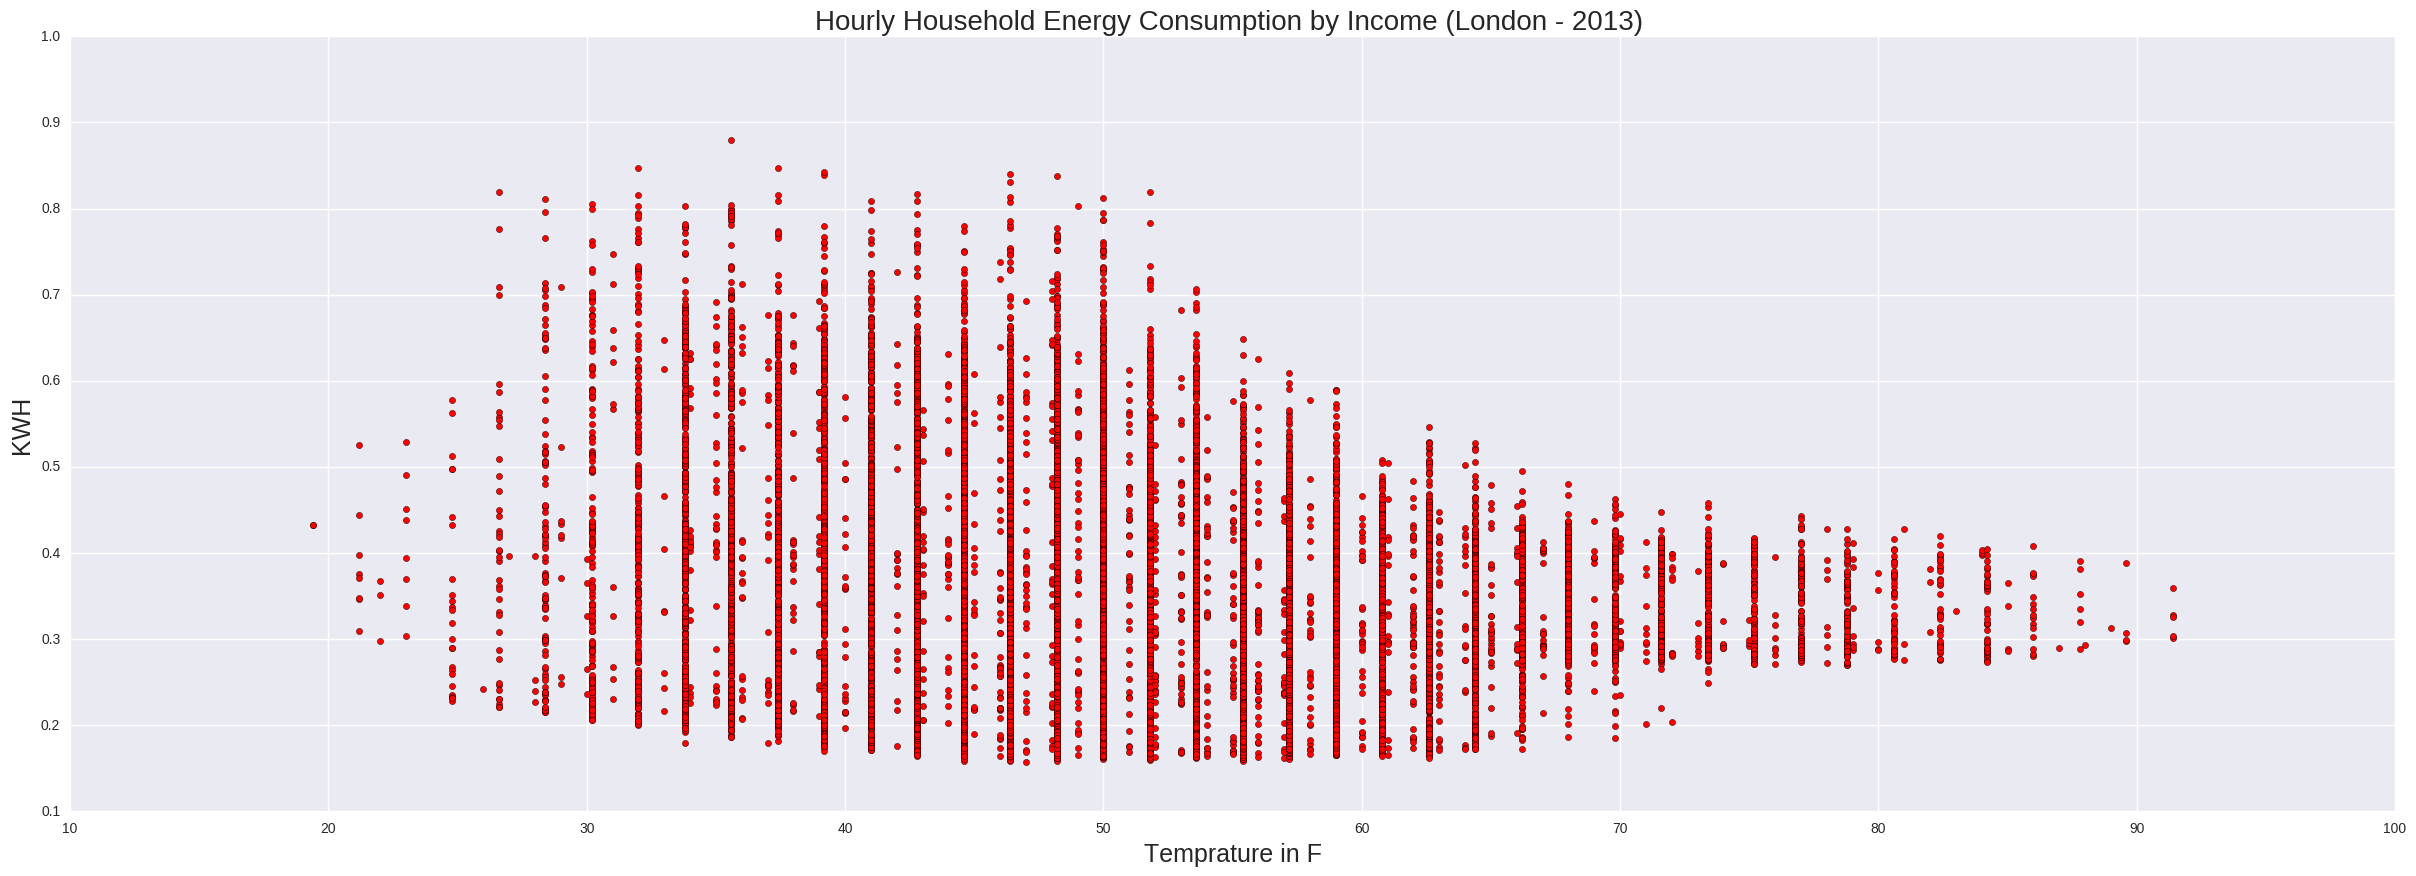

In [75]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
#ax2 = ax1.twinx()
final1213.plot(kind='scatter', x='Temperature_F', y='Low_Income', color='red',alpha=1, ax=ax1)
#final2013.plot(x='index', y='Low_Income', color='Green',alpha=.2, ax=ax1)
#final2013.plot(x='index', y='High_Income', color='Red', alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Middle_Income', color='Blue',alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
#pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

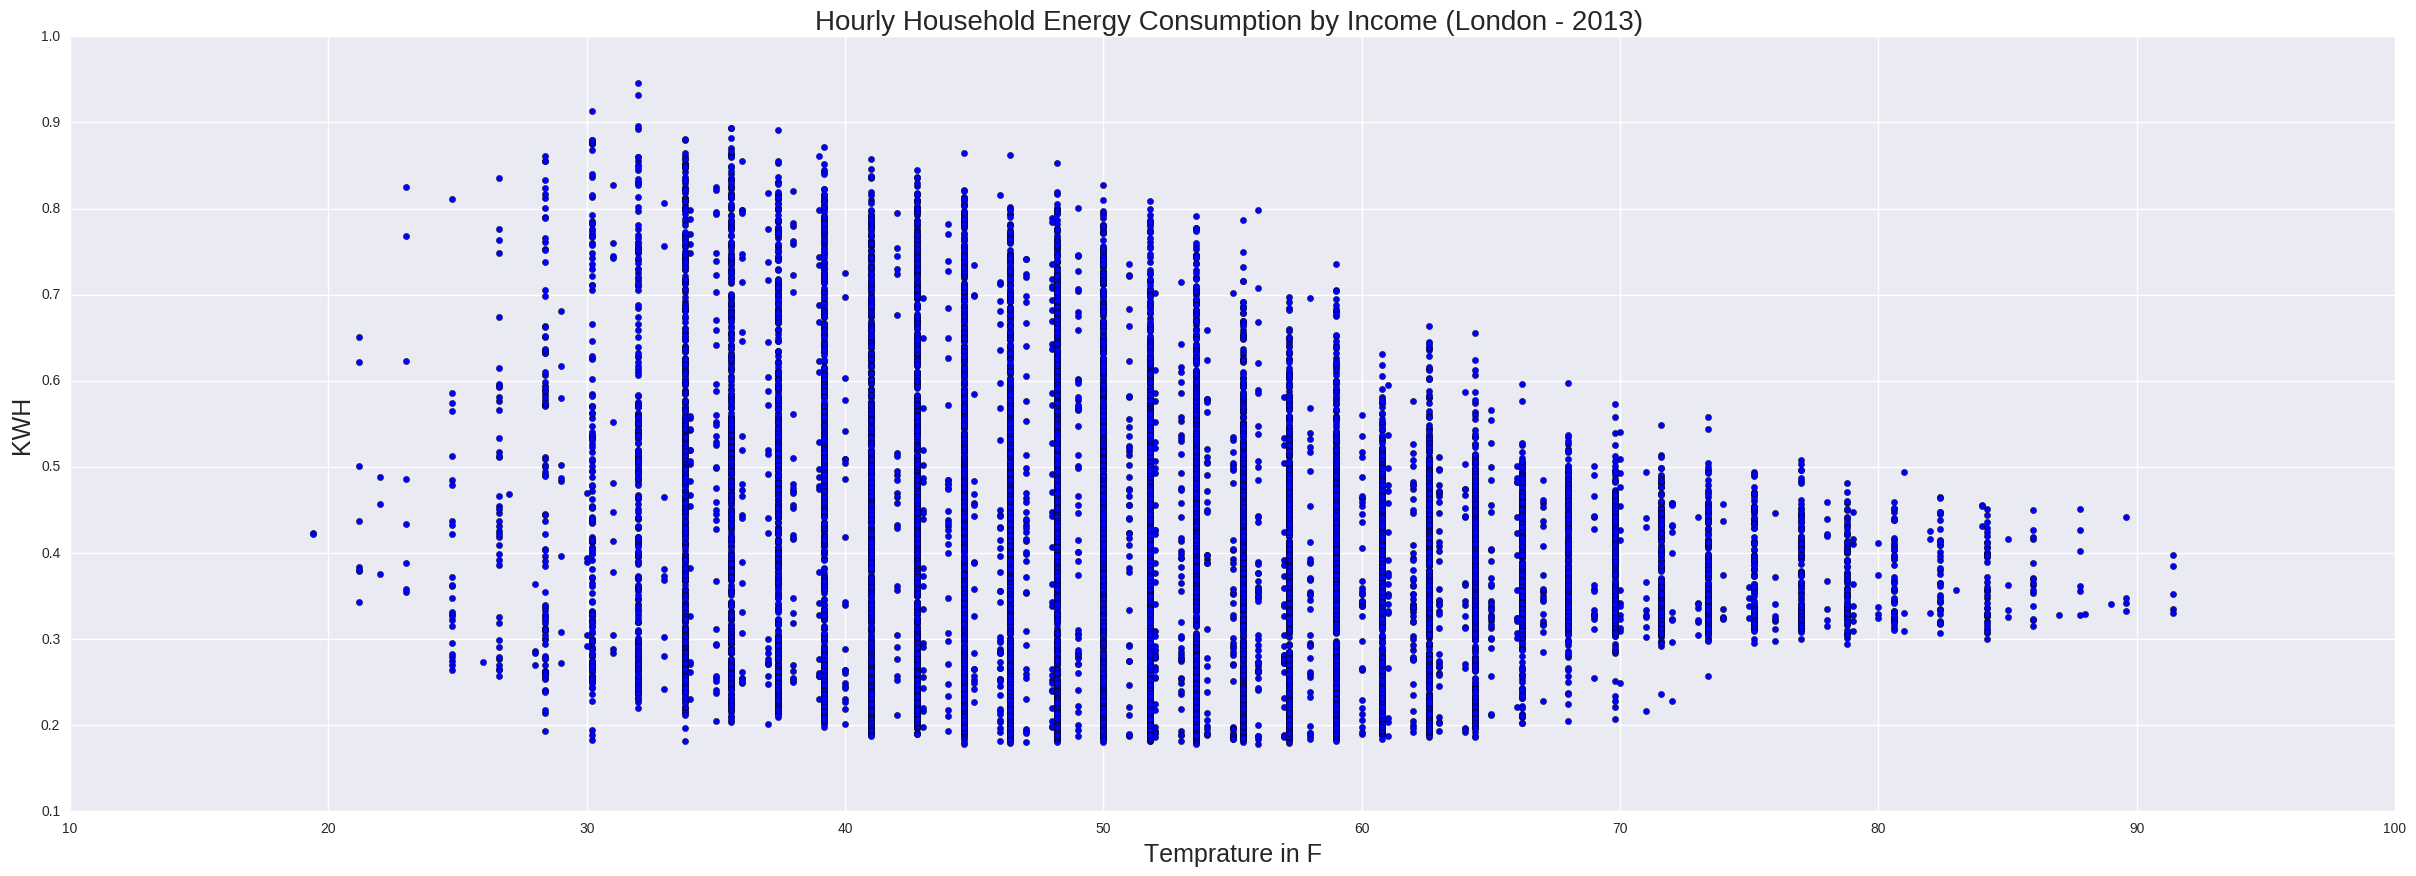

In [76]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
#ax2 = ax1.twinx()
final1213.plot(kind='scatter', x='Temperature_F', y='Middle_Income', color='blue',alpha=1, ax=ax1)
#final2013.plot(x='index', y='Low_Income', color='Green',alpha=.2, ax=ax1)
#final2013.plot(x='index', y='High_Income', color='Red', alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Middle_Income', color='Blue',alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
#pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

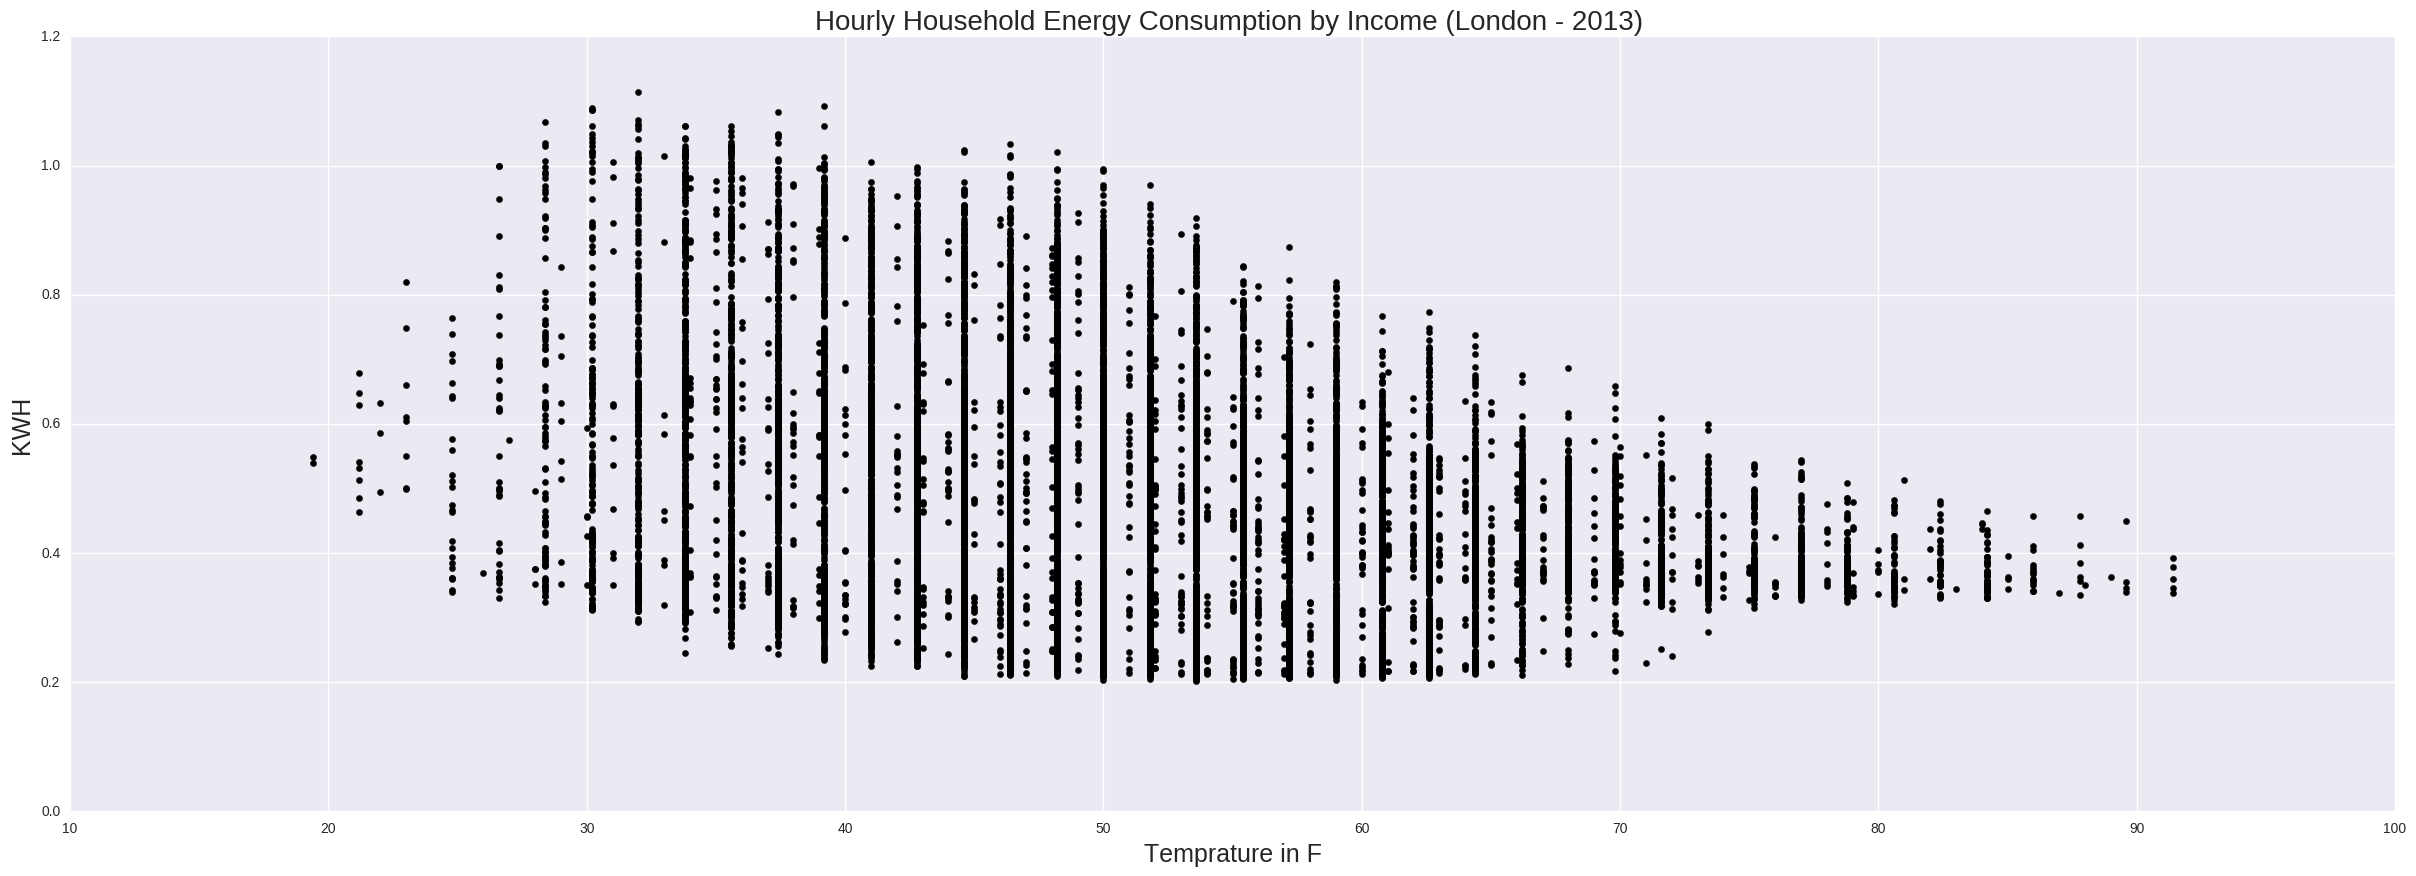

In [77]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
#ax2 = ax1.twinx()
final1213.plot(kind='scatter', x='Temperature_F', y='High_Income', color='black',alpha=1, ax=ax1)
#final2013.plot(x='index', y='Low_Income', color='Green',alpha=.2, ax=ax1)
#final2013.plot(x='index', y='High_Income', color='Red', alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Middle_Income', color='Blue',alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
#pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

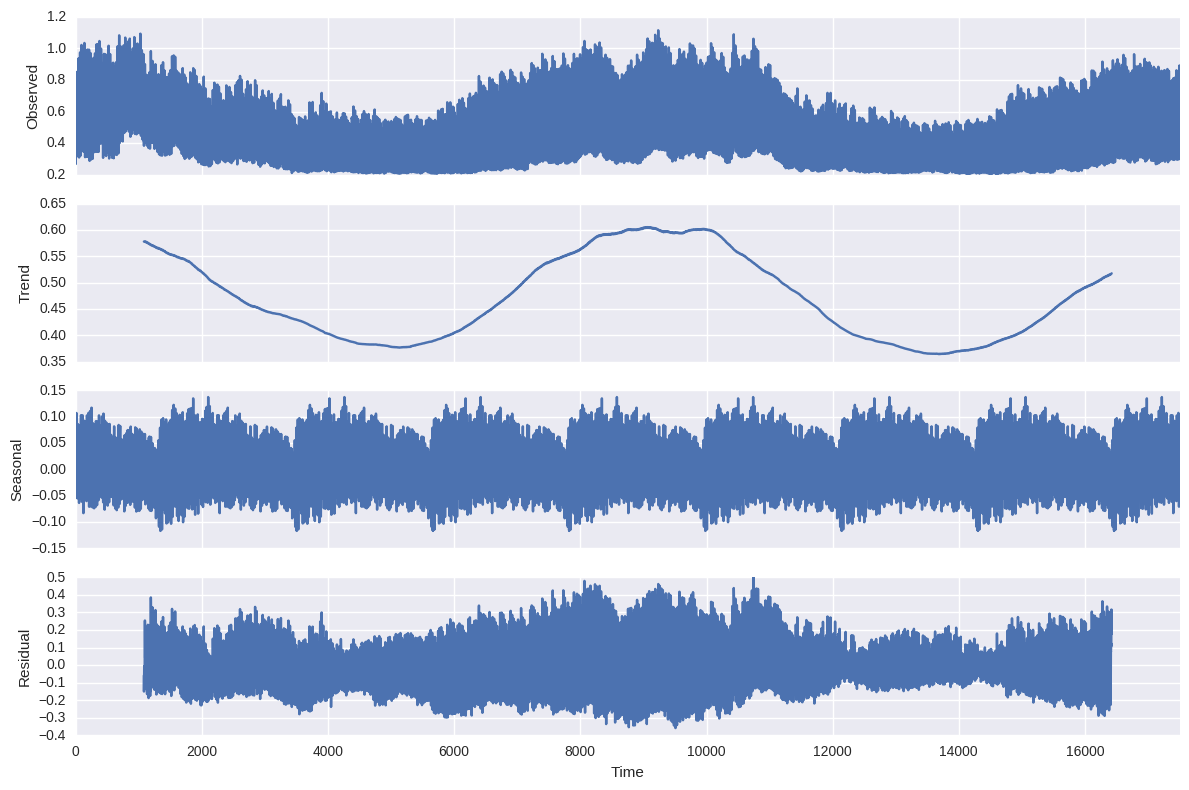

In [87]:
##Seasonal Decomposition of high income energy consumption
data = np.array(final1213.High_Income)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(data, freq = 24*90)
plt.rcParams['figure.figsize'] = (12,8)
resplot = res.plot()

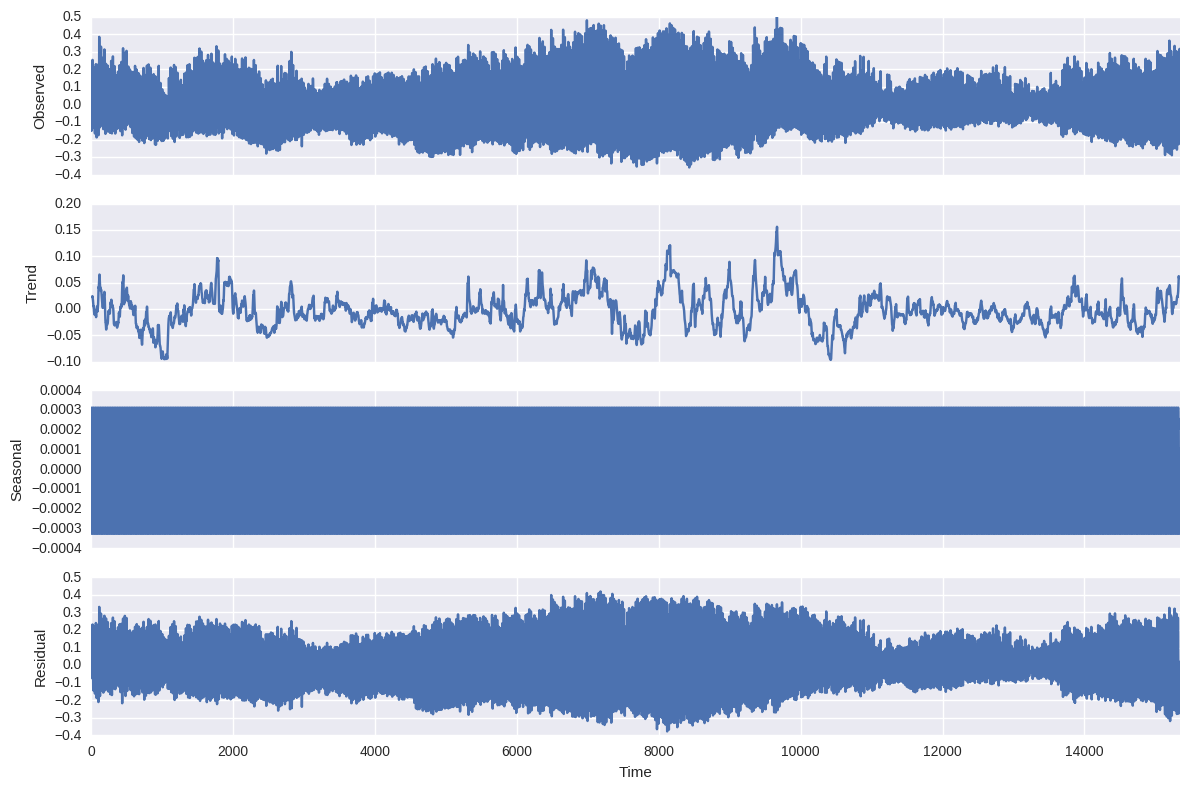

In [90]:
##Seasonal Decomposition of high income energy consumption
data = res.resid[(12*90):-(12*90)]
#Seasonal Decomposition using statsmodels api
res1 = sm.tsa.seasonal_decompose(data, freq = 24)
plt.rcParams['figure.figsize'] = (12,8)
resplot = res1.plot()

In [125]:
data2 = final1213.groupby(['Temperature_F']).mean()
data2.reset_index(inplace=True)
data2.head()

Temperature_F  Dew_Point_F   Humidity  Wind_Speed_MPH  Low_Income  \
0           19.4    15.800000  86.000000        2.300000    0.432138   
1           21.2    18.050000  87.750000        3.487500    0.389513   
2           22.0    19.333333  83.666667        3.500000    0.338869   
3           23.0    19.125000  84.125000        3.471429    0.414354   
4           24.8    22.136000  90.000000        3.352632    0.346272   

   High_Income  Middle_Income   Overall  HI_residuals  
0     0.543331       0.422758  0.487586      0.532540  
1     0.561303       0.462054  0.495268      0.592145  
2     0.570728       0.440132  0.482308      0.613955  
3     0.624183       0.529608  0.548037      0.651655  
4     0.506959       0.401671  0.432747      0.513292

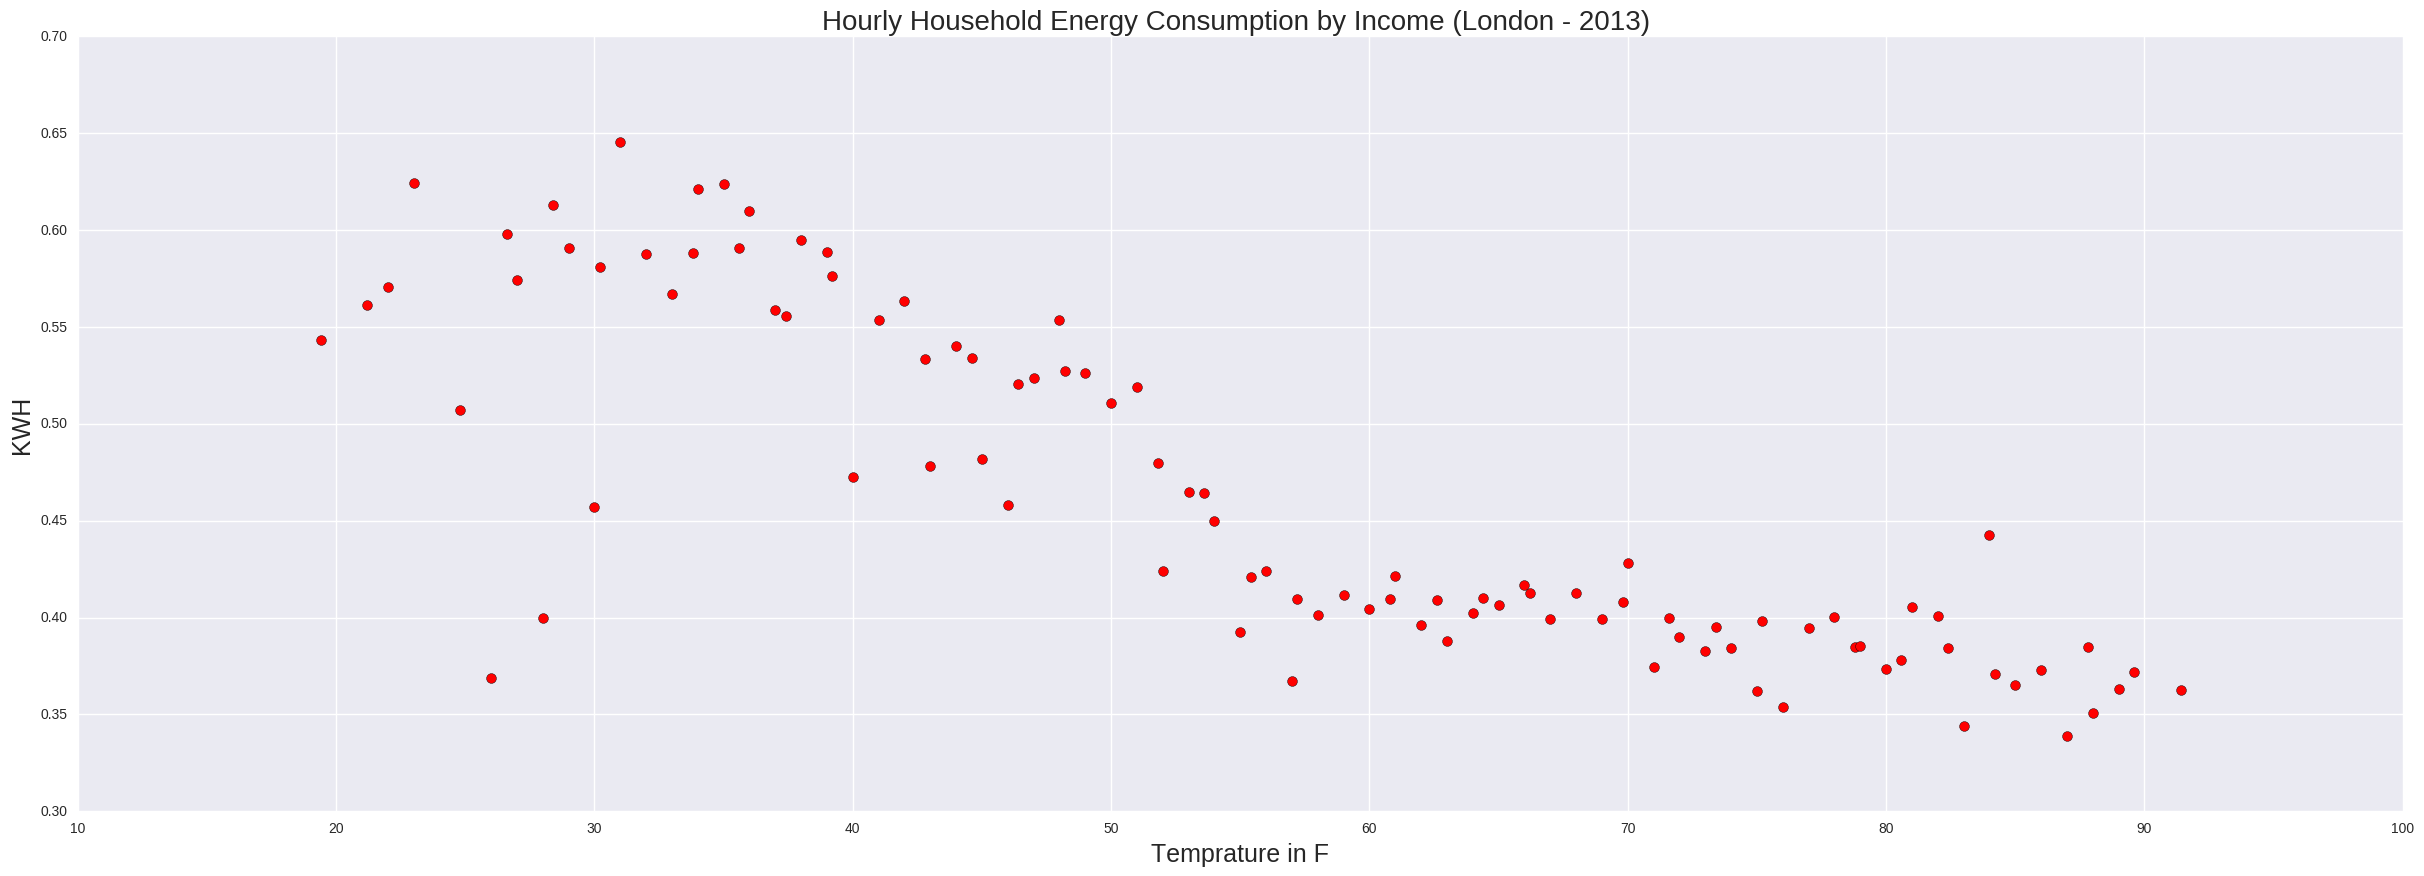

In [126]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
#ax2 = ax1.twinx()
data2.plot(kind='scatter', x='Temperature_F', y='High_Income', color='r',s=50, alpha=1, ax=ax1)
#final2013.plot(x='index', y='Low_Income', color='Green',alpha=.2, ax=ax1)
#final2013.plot(x='index', y='High_Income', color='Red', alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Middle_Income', color='Blue',alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
#pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

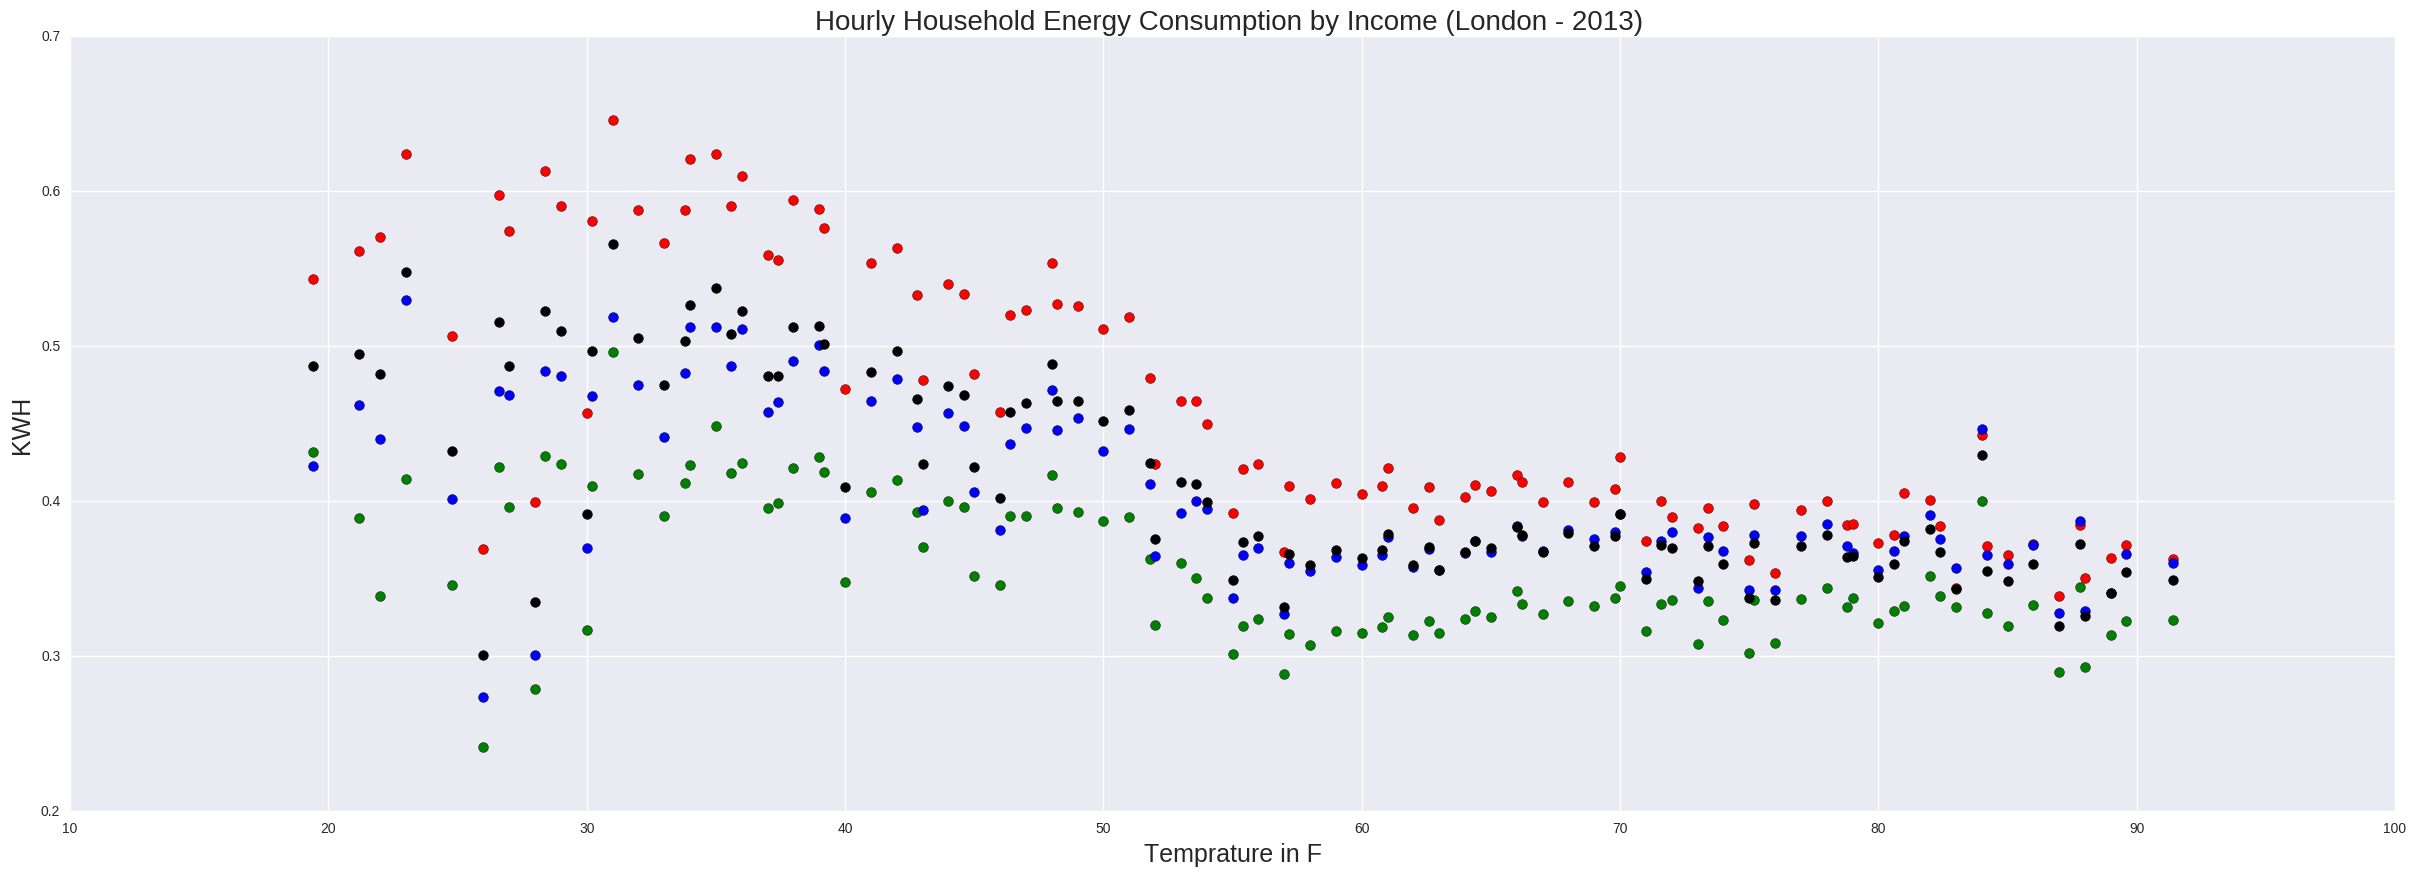

In [99]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
#ax2 = ax1.twinx()
data2.plot(kind='scatter', x='Temperature_F', y='High_Income', color='r',s=50, alpha=1, ax=ax1)
data2.plot(kind='scatter', x='Temperature_F', y='Low_Income', color='g',s=50, alpha=1, ax=ax1)
data2.plot(kind='scatter', x='Temperature_F', y='Middle_Income', color='b',s=50, alpha=1, ax=ax1)
data2.plot(kind='scatter', x='Temperature_F', y='Overall', color='k',s=50, alpha=1, ax=ax1)

pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
#pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

In [134]:
#fitting a poly curve
z = np.polyfit(data2.Temperature_F, data2.Overall, 3)
z

array([  2.14433204e-06,  -3.43759472e-04,   1.42865956e-02,
         3.08262626e-01])

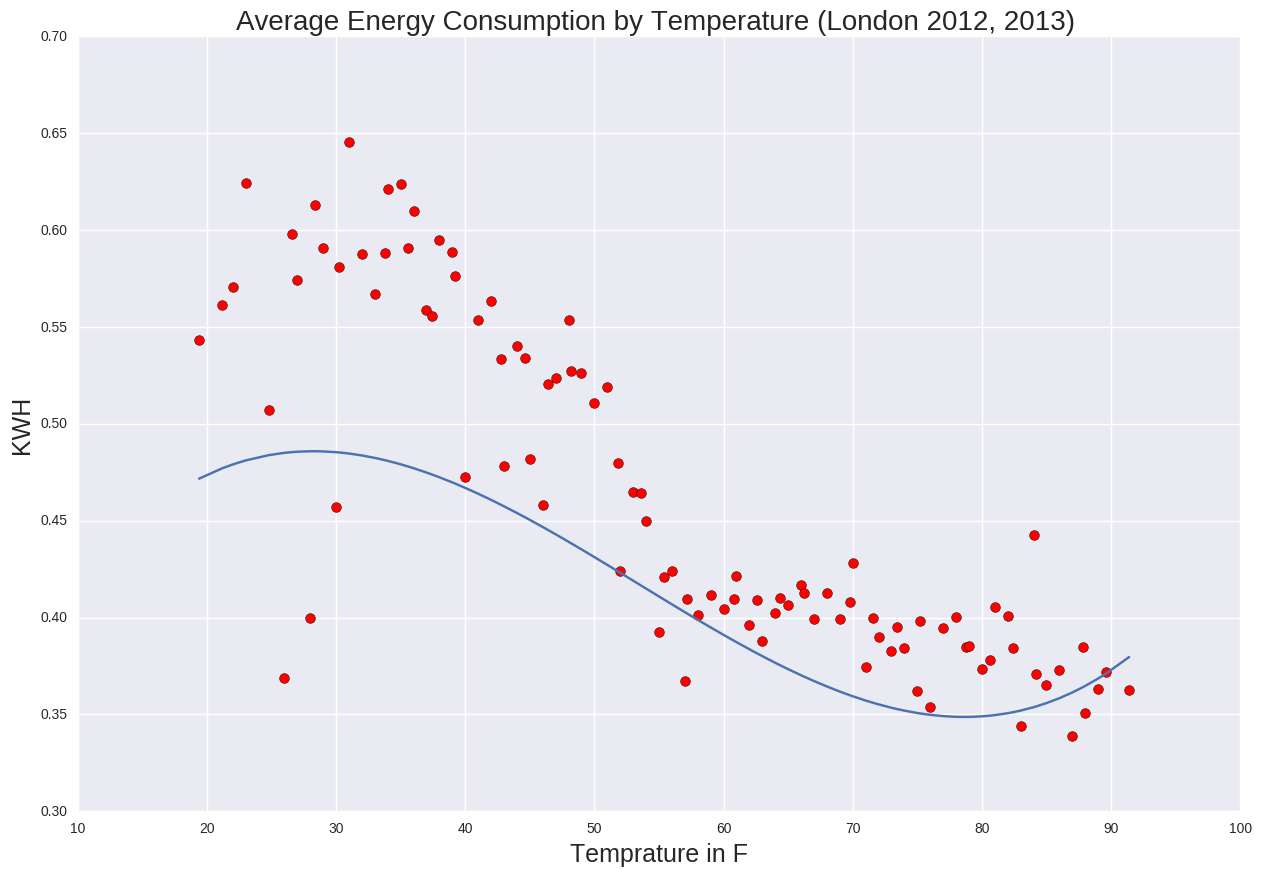

In [135]:
#Plotting the polyfit
p = np.poly1d(z)

ax1 = pl.figure(figsize=(15,10)).add_subplot(111)
data2.plot(kind='scatter', x='Temperature_F', y='High_Income', color='r',s=50, alpha=1, ax=ax1)
plt.plot(data2.Temperature_F, p(data2.Temperature_F))
pl.title('Average Energy Consumption by Temperature (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)

In [130]:
# Removing outliers
data3 = data2.copy()
data3.drop([5,8,11], inplace=True)
data3

Temperature_F  Dew_Point_F   Humidity  Wind_Speed_MPH  Low_Income  \
0            19.4    15.800000  86.000000        2.300000    0.432138   
1            21.2    18.050000  87.750000        3.487500    0.389513   
2            22.0    19.333333  83.666667        3.500000    0.338869   
3            23.0    19.125000  84.125000        3.471429    0.414354   
4            24.8    22.136000  90.000000        3.352632    0.346272   
6            26.6    22.030769  83.461538        4.857143    0.422164   
7            27.0    26.000000  95.000000        1.200000    0.396299   
9            28.4    24.250526  85.042105        6.067059    0.429532   
10           29.0    25.000000  79.777778        7.166667    0.423902   
12           30.2    26.780000  87.618750        6.203947    0.409913   
13           31.0    26.000000  77.666667        5.783333    0.496304   
14           32.0    27.121705  82.476744        7.307377    0.417360   
15           33.0    25.444444  64.666667        7.188889    0.390685   
16           33.8    28.096250  80.743750        7.277302    0.412124   
17           34.0    27.363636  70.045455        8.490909    0.423312   
18           35.0    29.594595  75.054054        7.608108    0.448379   
19           35.6    30.317227  82.027311        7.367826    0.418470   
20           36.0    31.160000  76.800000        7.760000    0.424971   
21           37.0    31.608696  75.217391        9.926087    0.395992   
22           37.4    32.501527  83.190840        7.500781    0.398641   
23           38.0    34.461538  82.538462        6.530769    0.421205   
24           39.0    33.571429  75.333333        7.752381    0.428679   
25           39.2    33.859779  81.972325        7.822787    0.418798   
26           40.0    34.304348  75.000000        8.426087    0.348054   
27           41.0    35.185692  80.432432        7.988474    0.406002   
28           42.0    36.458333  75.458333        8.708333    0.413738   
29           42.8    37.526633  82.267588        8.308046    0.393059   
30           43.0    35.909091  69.636364        8.545455    0.370744   
31           44.0    39.322581  79.000000        8.406452    0.400179   
32           44.6    39.300817  82.250875        8.902243    0.396604   
..            ...          ...        ...             ...         ...   
69           70.0    53.933333  47.600000        8.533333    0.345278   
70           71.0    53.454545  44.454545       10.381818    0.316303   
71           71.6    54.691943  56.142180        9.699524    0.333690   
72           72.0    52.916667  41.333333        8.075000    0.336141   
73           73.0    55.714286  45.285714        9.400000    0.307832   
74           73.4    54.690909  52.951515       10.180488    0.336017   
75           74.0    55.000000  42.142857        9.228571    0.323487   
76           75.0    53.750000  37.000000        8.950000    0.302328   
77           75.2    54.389474  48.964912        9.496491    0.336047   
78           76.0    55.125000  38.375000       11.237500    0.308753   
79           77.0    53.882243  45.009346        9.259813    0.336996   
80           78.0    54.375000  34.625000       10.087500    0.344030   
81           78.8    53.838554  43.240964        9.024096    0.331932   
82           79.0    51.875000  28.625000        8.225000    0.337538   
83           80.0    51.600000  27.200000        9.940000    0.321303   
84           80.6    52.772000  39.160000        9.574000    0.329364   
85           81.0    64.000000  47.333333       11.133333    0.332791   
86           82.0    61.000000  39.333333       10.766667    0.352018   
87           82.4    54.086486  38.162162        8.632432    0.338676   
88           83.0    56.000000  29.000000        9.200000    0.332108   
89           84.0    52.333333  24.000000        8.833333    0.400151   
90           84.2    54.353488  36.651163        7.725581    0.327812   
91           85.0    50.750000  21.500000        5.750000    0

In [147]:
#fitting a poly curve
z = np.polyfit(data3.Temperature_F, data3.Overall, 3)
z

array([  1.93304362e-06,  -2.93119133e-04,   1.04014656e-02,
         4.03110214e-01])

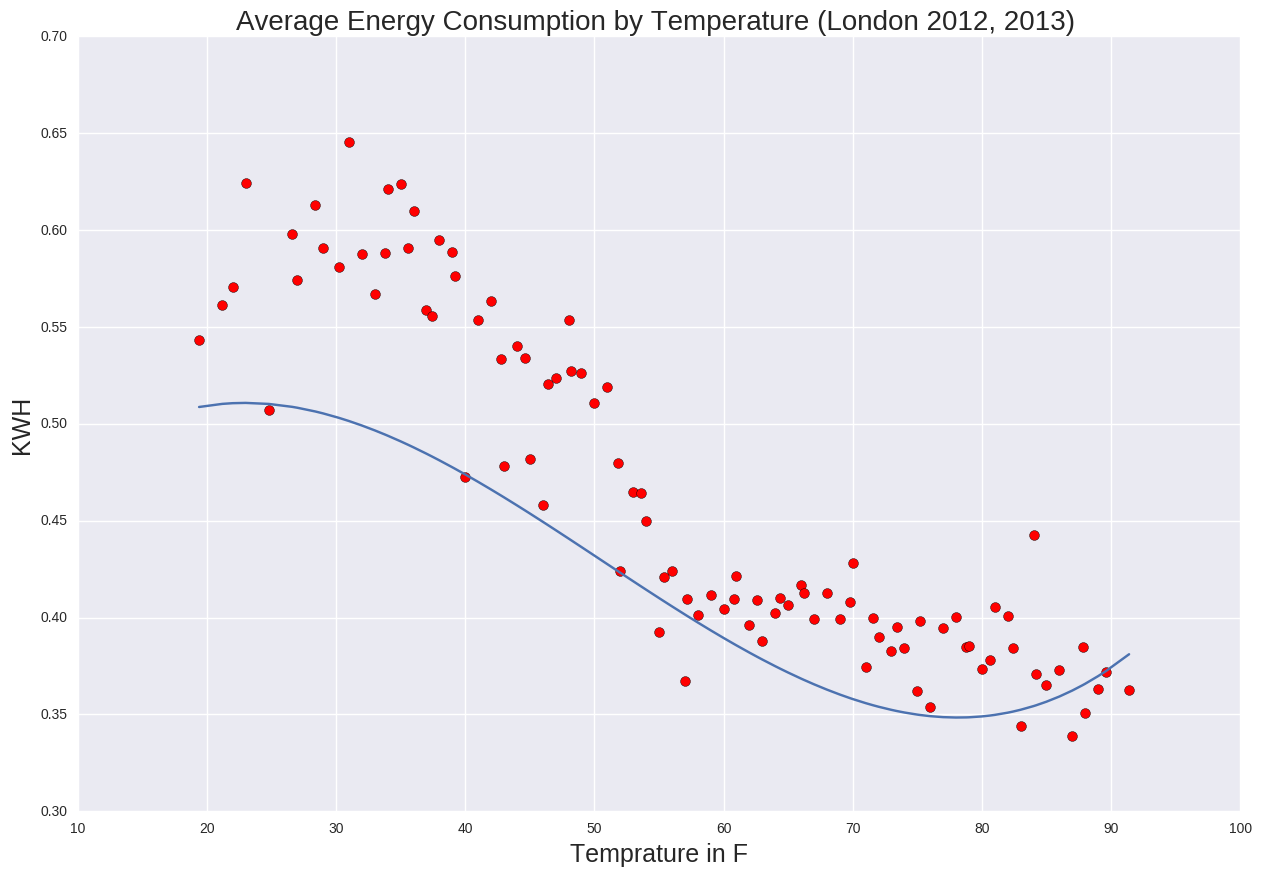

In [148]:
#Plotting the polyfit
p = np.poly1d(z)

ax1 = pl.figure(figsize=(15,10)).add_subplot(111)
data3.plot(kind='scatter', x='Temperature_F', y='High_Income', color='r',s=50, alpha=1, ax=ax1)
plt.plot(data3.Temperature_F, p(data3.Temperature_F))
pl.title('Average Energy Consumption by Temperature (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)

In [149]:
# 2 hour lag
x = np.array(final1213.Temperature_F[2:])
y1 = np.array(final1213.Overall[:-2])
y2 = np.array(final1213.High_Income[:-2])
y3 = np.array(final1213.Middle_Income[:-2])
y4 = np.array(final1213.Low_Income[:-2])
timelag = pd.DataFrame()
timelag['Temp'] = x
timelag['Overall'] = y1
timelag['High'] = y2
timelag['Middle'] = y3
timelag['Low'] = y4
timelag.head()

Temp   Overall      High    Middle       Low
0  53.6  0.231749  0.268072  0.190114  0.221192
1  53.0  0.550101  0.633311  0.355447  0.616456
2  53.6  0.466764  0.570036  0.296605  0.483976
3  53.6  0.383123  0.489018  0.236228  0.375616
4  53.0  0.312892  0.376808  0.206053  0.324936

In [151]:
lag_grp2 = timelag.groupby(['Temp']).mean()
lag_grp2.reset_index(inplace=True)
lag_grp2.head()

Temp   Overall      High    Middle       Low
0  19.4  0.419314  0.474088  0.361236  0.359275
1  21.2  0.522645  0.599818  0.475660  0.406970
2  22.0  0.637393  0.714296  0.669432  0.447337
3  23.0  0.546163  0.626166  0.488580  0.443042
4  24.8  0.435122  0.505273  0.414192  0.342772

In [154]:
#fitting a poly curve
z = np.polyfit(lag_grp2.Temp, lag_grp2.Overall, 3)
z

array([  2.37911845e-06,  -3.69913849e-04,   1.37559273e-02,
         3.82908785e-01])

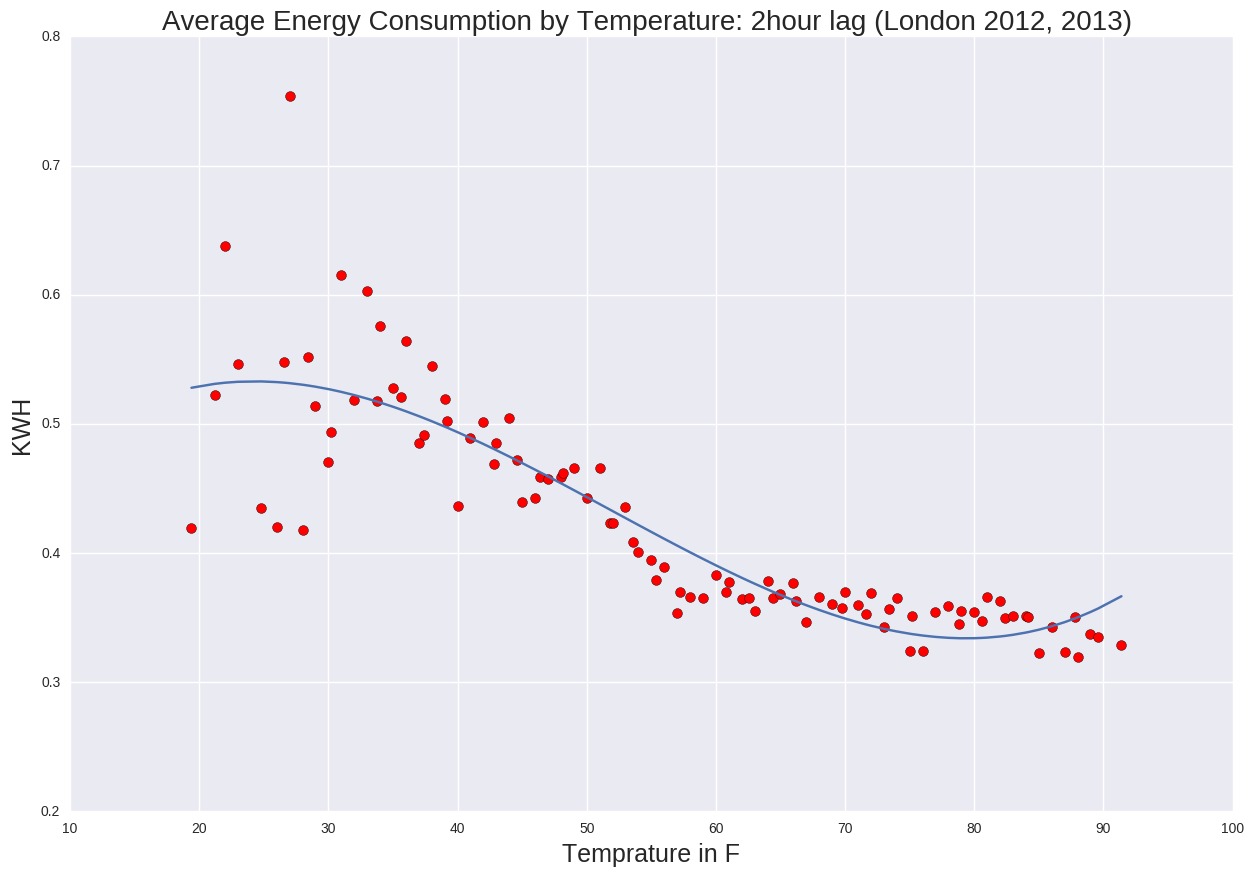

In [155]:
#Plotting the polyfit
p = np.poly1d(z)

ax1 = pl.figure(figsize=(15,10)).add_subplot(111)
lag_grp2.plot(kind='scatter', x='Temp', y='Overall', color='r',s=50, alpha=1, ax=ax1)
plt.plot(lag_grp2.Temp, p(lag_grp2.Temp))
pl.title('Average Energy Consumption by Temperature: 2hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)

# Fuck Yeh!


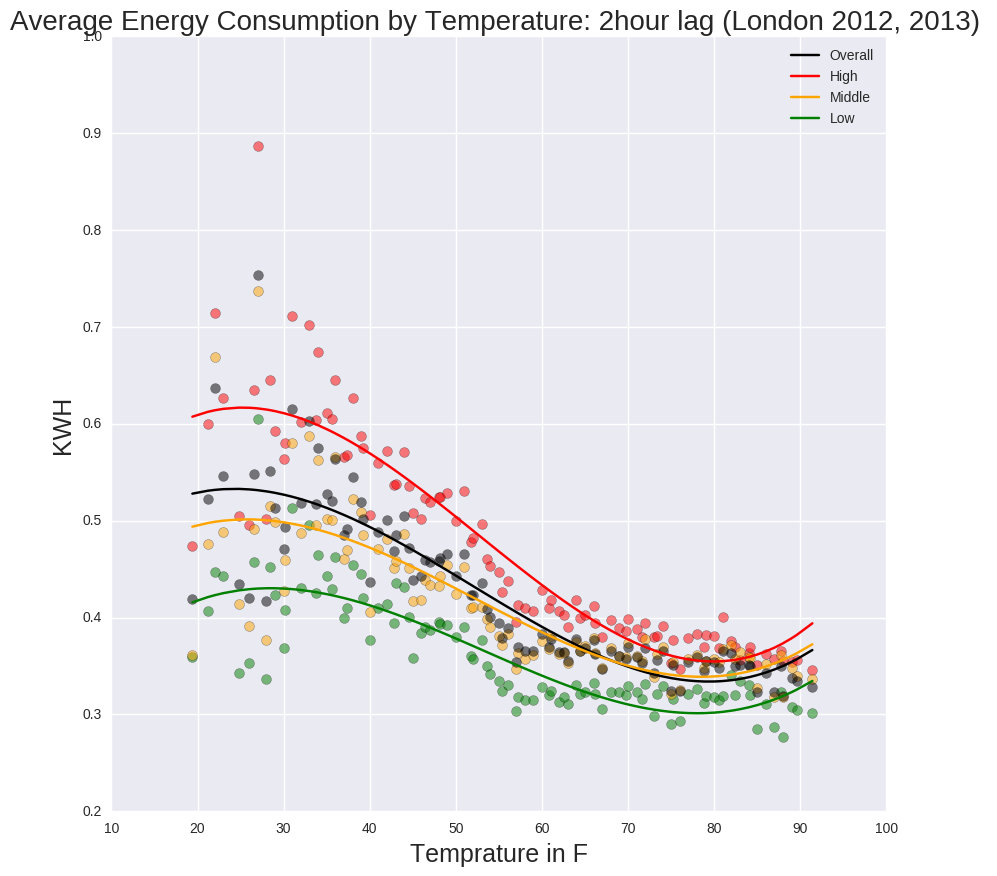

In [159]:
p1 = np.poly1d(np.polyfit(lag_grp2.Temp, lag_grp2.Overall, 3))
p2 = np.poly1d(np.polyfit(lag_grp2.Temp, lag_grp2.High, 3))
p3 = np.poly1d(np.polyfit(lag_grp2.Temp, lag_grp2.Middle, 3))
p4 = np.poly1d(np.polyfit(lag_grp2.Temp, lag_grp2.Low, 3))

ax1 = pl.figure(figsize=(10,10)).add_subplot(111)
lag_grp2.plot(kind='scatter', x='Temp', y='High', color='r',s=50, alpha=0.5, ax=ax1)
lag_grp2.plot(kind='scatter', x='Temp', y='Low', color='g',s=50, alpha=0.5, ax=ax1)
lag_grp2.plot(kind='scatter', x='Temp', y='Middle', color='orange',s=50, alpha=0.5, ax=ax1)
lag_grp2.plot(kind='scatter', x='Temp', y='Overall', color='k',s=50, alpha=0.5, ax=ax1)
plt.plot(lag_grp2.Temp, p1(lag_grp2.Temp), color = 'k', label = 'Overall')
plt.plot(lag_grp2.Temp, p2(lag_grp2.Temp), color = 'r', label = 'High')
plt.plot(lag_grp2.Temp, p3(lag_grp2.Temp), color = 'orange', label = 'Middle')
plt.plot(lag_grp2.Temp, p4(lag_grp2.Temp), color = 'g', label = 'Low')
pl.title('Average Energy Consumption by Temperature: 2hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
pl.legend()

# Fuck Yeh squared!


In [160]:
# 3 hour lag
x = np.array(final1213.Temperature_F[3:])
y1 = np.array(final1213.Overall[:-3])
y2 = np.array(final1213.High_Income[:-3])
y3 = np.array(final1213.Middle_Income[:-3])
y4 = np.array(final1213.Low_Income[:-3])
timelag = pd.DataFrame()
timelag['Temp'] = x
timelag['Overall'] = y1
timelag['High'] = y2
timelag['Middle'] = y3
timelag['Low'] = y4
timelag.head()

Temp   Overall      High    Middle       Low
0  53.0  0.231749  0.268072  0.190114  0.221192
1  53.6  0.550101  0.633311  0.355447  0.616456
2  53.6  0.466764  0.570036  0.296605  0.483976
3  53.0  0.383123  0.489018  0.236228  0.375616
4  53.6  0.312892  0.376808  0.206053  0.324936

In [161]:
lag_grp3 = timelag.groupby(['Temp']).mean()
lag_grp3.reset_index(inplace=True)
lag_grp3.head()

Temp   Overall      High    Middle       Low
0  19.4  0.437099  0.513046  0.363609  0.346901
1  21.2  0.598733  0.672633  0.579367  0.463207
2  22.0  0.544025  0.635439  0.455517  0.441777
3  23.0  0.583457  0.668468  0.521490  0.474620
4  24.8  0.468950  0.542290  0.449821  0.370566

In [162]:
#fitting a poly curve
z = np.polyfit(lag_grp3.Temp, lag_grp3.Overall, 3)
z

array([  2.19295493e-06,  -3.20990361e-04,   9.84047243e-03,
         4.75036591e-01])

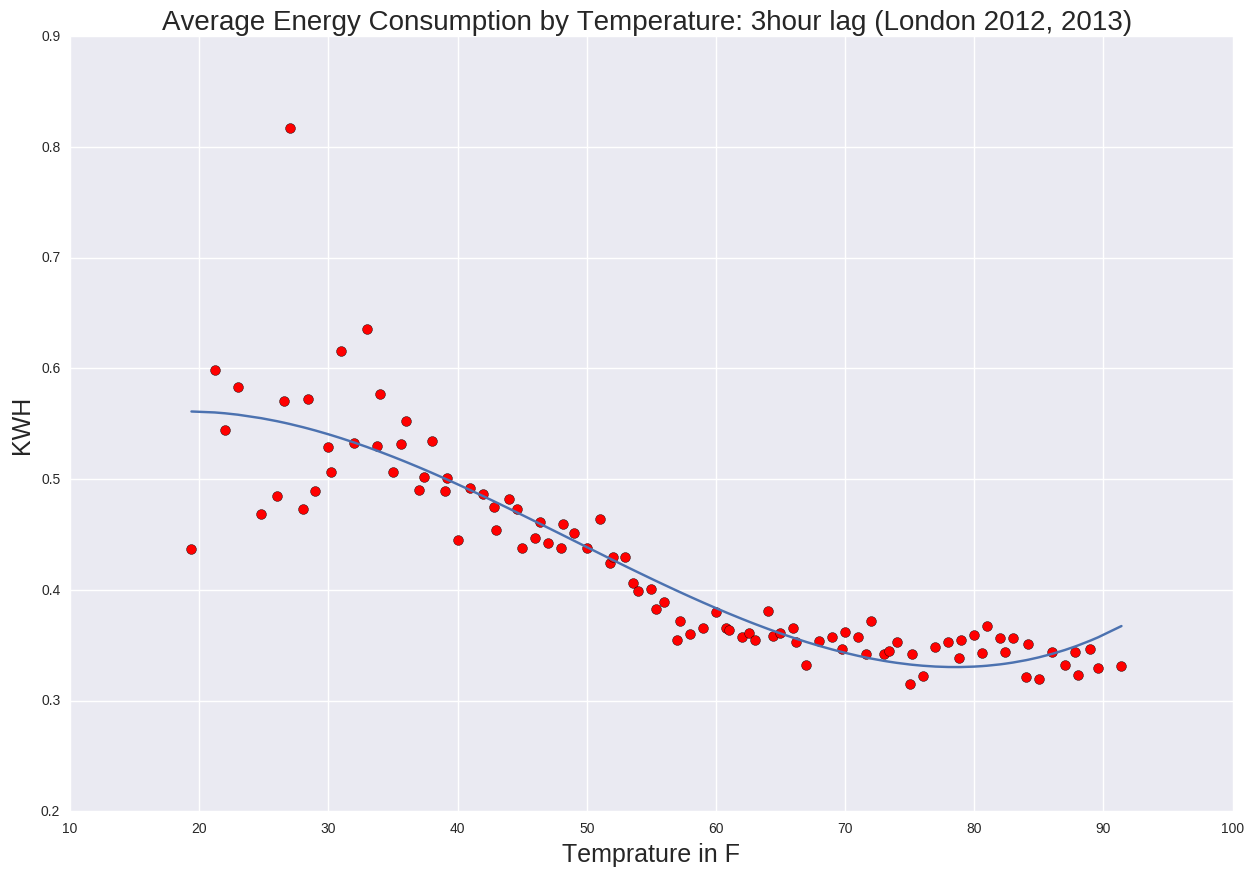

In [165]:
#Plotting the polyfit
p = np.poly1d(z)

ax1 = pl.figure(figsize=(15,10)).add_subplot(111)
lag_grp3.plot(kind='scatter', x='Temp', y='Overall', color='r',s=50, alpha=1, ax=ax1)
plt.plot(lag_grp3.Temp, p(lag_grp3.Temp))
pl.title('Average Energy Consumption by Temperature: 3hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)

# Fuck Yeh!


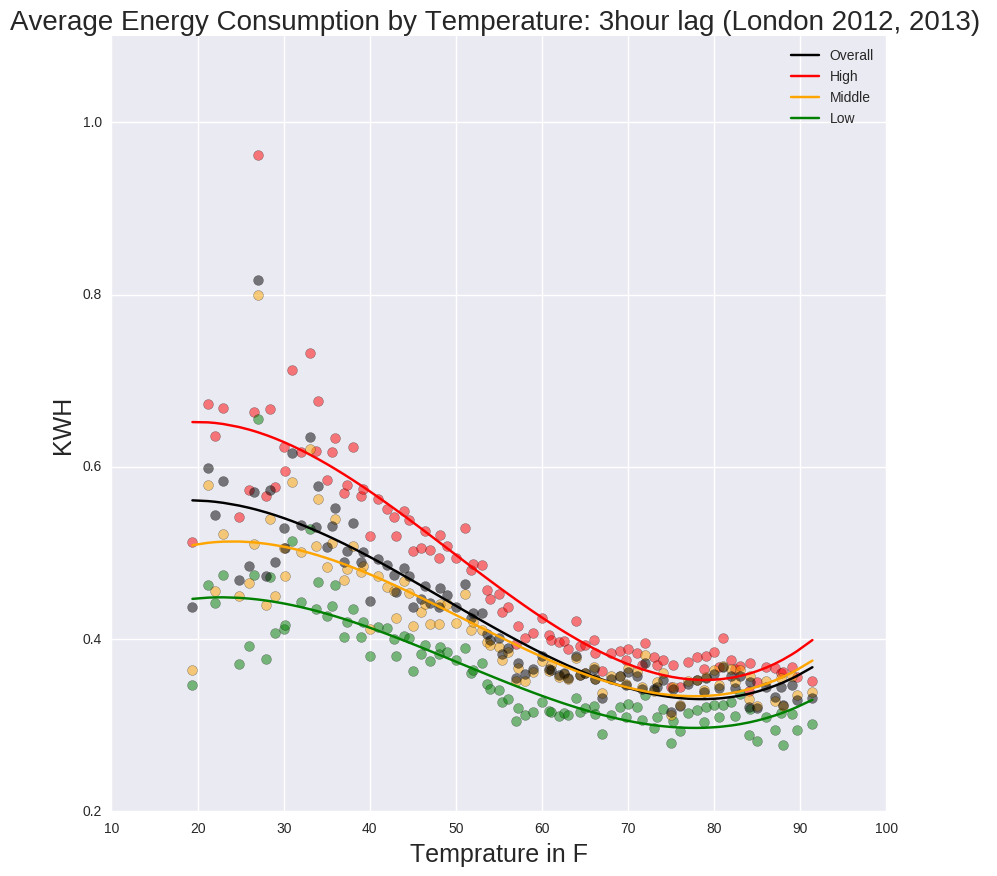

In [164]:
p1 = np.poly1d(np.polyfit(lag_grp3.Temp, lag_grp3.Overall, 3))
p2 = np.poly1d(np.polyfit(lag_grp3.Temp, lag_grp3.High, 3))
p3 = np.poly1d(np.polyfit(lag_grp3.Temp, lag_grp3.Middle, 3))
p4 = np.poly1d(np.polyfit(lag_grp3.Temp, lag_grp3.Low, 3))

ax1 = pl.figure(figsize=(10,10)).add_subplot(111)
lag_grp3.plot(kind='scatter', x='Temp', y='High', color='r',s=50, alpha=0.5, ax=ax1)
lag_grp3.plot(kind='scatter', x='Temp', y='Low', color='g',s=50, alpha=0.5, ax=ax1)
lag_grp3.plot(kind='scatter', x='Temp', y='Middle', color='orange',s=50, alpha=0.5, ax=ax1)
lag_grp3.plot(kind='scatter', x='Temp', y='Overall', color='k',s=50, alpha=0.5, ax=ax1)
plt.plot(lag_grp3.Temp, p1(lag_grp3.Temp), color = 'k', label = 'Overall')
plt.plot(lag_grp3.Temp, p2(lag_grp3.Temp), color = 'r', label = 'High')
plt.plot(lag_grp3.Temp, p3(lag_grp3.Temp), color = 'orange', label = 'Middle')
plt.plot(lag_grp3.Temp, p4(lag_grp3.Temp), color = 'g', label = 'Low')
pl.title('Average Energy Consumption by Temperature: 3hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
pl.legend()

In [166]:
# 4 hour lag
x = np.array(final1213.Temperature_F[4:])
y1 = np.array(final1213.Overall[:-4])
y2 = np.array(final1213.High_Income[:-4])
y3 = np.array(final1213.Middle_Income[:-4])
y4 = np.array(final1213.Low_Income[:-4])
timelag = pd.DataFrame()
timelag['Temp'] = x
timelag['Overall'] = y1
timelag['High'] = y2
timelag['Middle'] = y3
timelag['Low'] = y4
timelag.head()

Temp   Overall      High    Middle       Low
0  53.6  0.231749  0.268072  0.190114  0.221192
1  53.6  0.550101  0.633311  0.355447  0.616456
2  53.0  0.466764  0.570036  0.296605  0.483976
3  53.6  0.383123  0.489018  0.236228  0.375616
4  53.6  0.312892  0.376808  0.206053  0.324936

In [167]:
lag_grp4 = timelag.groupby(['Temp']).mean()
lag_grp4.reset_index(inplace=True)
lag_grp4.head()

Temp   Overall      High    Middle       Low
0  19.4  0.479243  0.563648  0.420139  0.356698
1  21.2  0.609349  0.686002  0.566018  0.491841
2  22.0  0.652641  0.741227  0.603422  0.516039
3  23.0  0.663246  0.753754  0.613410  0.532180
4  24.8  0.509862  0.595685  0.476302  0.404681

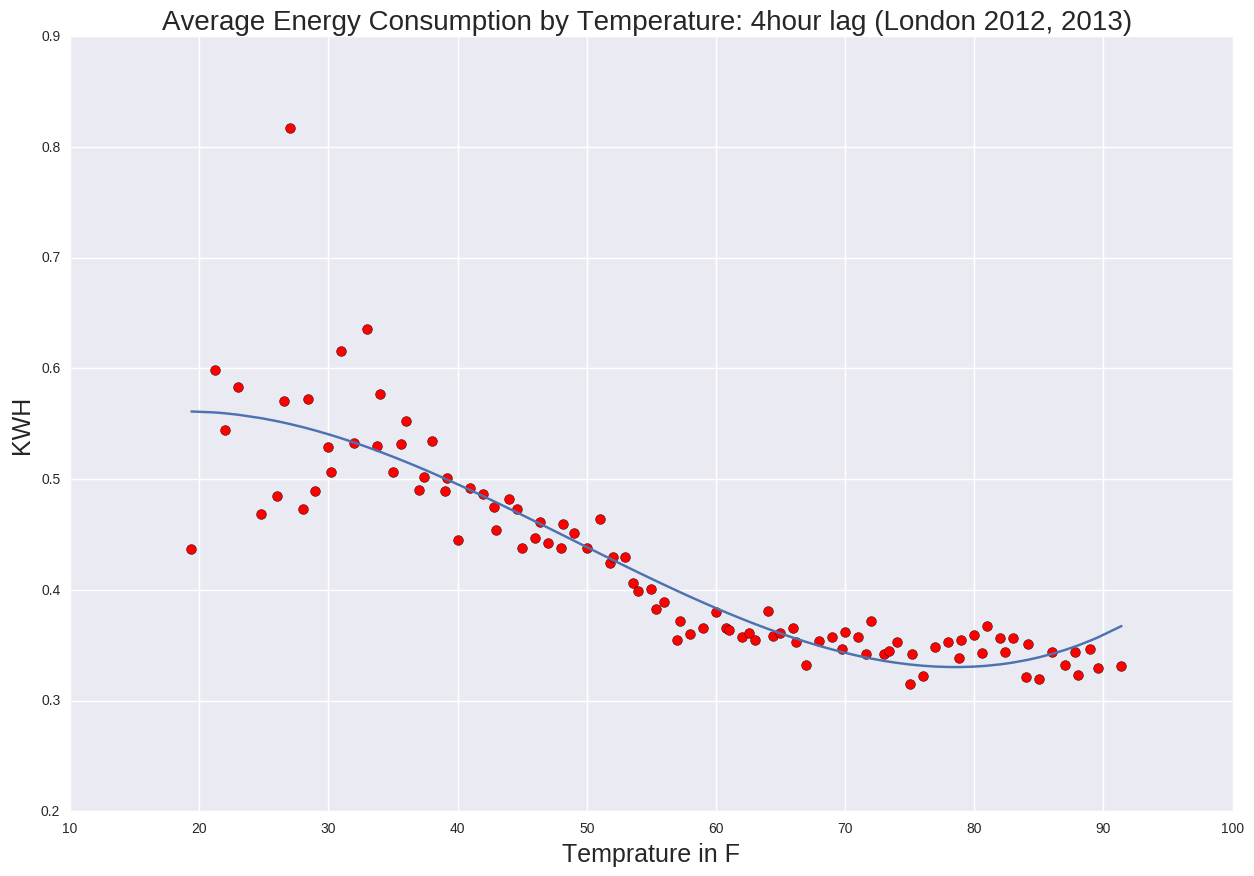

In [171]:
#Plotting the polyfit
p = np.poly1d(np.polyfit(lag_grp3.Temp, lag_grp3.Overall, 3))

ax1 = pl.figure(figsize=(15,10)).add_subplot(111)
lag_grp3.plot(kind='scatter', x='Temp', y='Overall', color='r',s=50, alpha=1, ax=ax1)
plt.plot(lag_grp3.Temp, p(lag_grp3.Temp))
pl.title('Average Energy Consumption by Temperature: 4hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)

# Fuck Yeh!


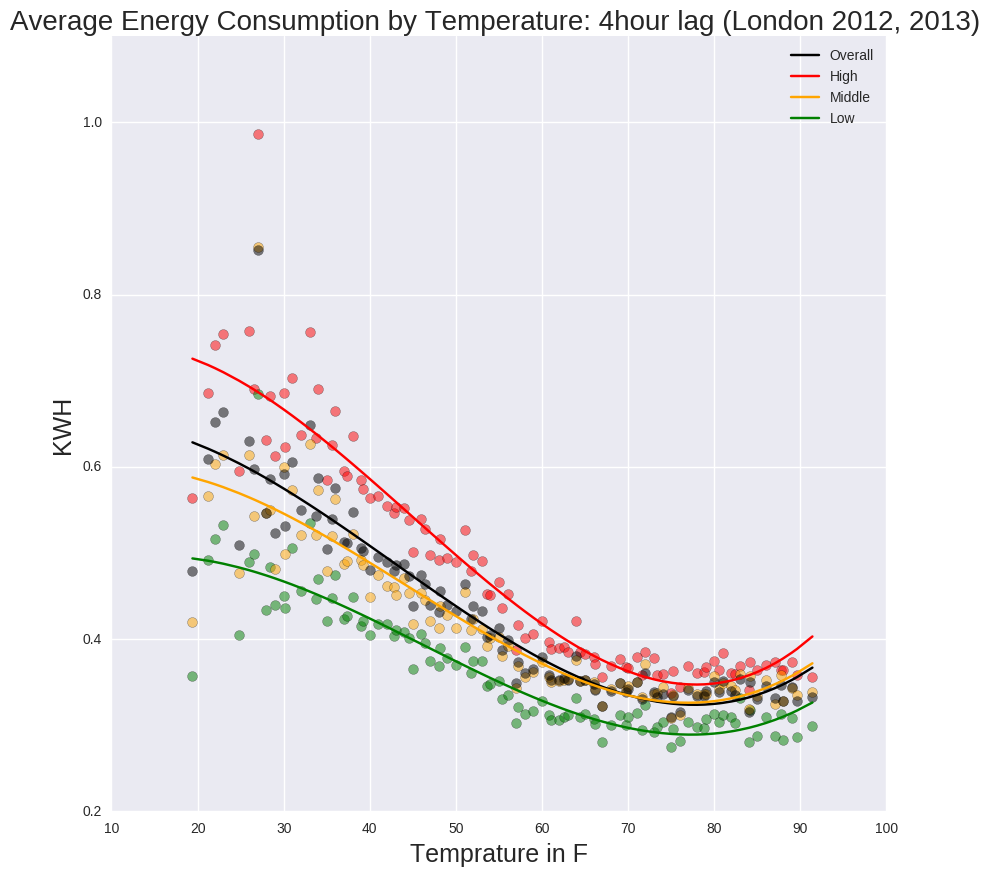

In [170]:
p1 = np.poly1d(np.polyfit(lag_grp4.Temp, lag_grp4.Overall, 3))
p2 = np.poly1d(np.polyfit(lag_grp4.Temp, lag_grp4.High, 3))
p3 = np.poly1d(np.polyfit(lag_grp4.Temp, lag_grp4.Middle, 3))
p4 = np.poly1d(np.polyfit(lag_grp4.Temp, lag_grp4.Low, 3))

ax1 = pl.figure(figsize=(10,10)).add_subplot(111)
lag_grp4.plot(kind='scatter', x='Temp', y='High', color='r',s=50, alpha=0.5, ax=ax1)
lag_grp4.plot(kind='scatter', x='Temp', y='Low', color='g',s=50, alpha=0.5, ax=ax1)
lag_grp4.plot(kind='scatter', x='Temp', y='Middle', color='orange',s=50, alpha=0.5, ax=ax1)
lag_grp4.plot(kind='scatter', x='Temp', y='Overall', color='k',s=50, alpha=0.5, ax=ax1)
plt.plot(lag_grp4.Temp, p1(lag_grp4.Temp), color = 'k', label = 'Overall')
plt.plot(lag_grp4.Temp, p2(lag_grp4.Temp), color = 'r', label = 'High')
plt.plot(lag_grp4.Temp, p3(lag_grp4.Temp), color = 'orange', label = 'Middle')
plt.plot(lag_grp4.Temp, p4(lag_grp4.Temp), color = 'g', label = 'Low')
pl.title('Average Energy Consumption by Temperature: 4hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
pl.legend()

In [172]:
# 5 hour lag
x = np.array(final1213.Temperature_F[5:])
y1 = np.array(final1213.Overall[:-5])
y2 = np.array(final1213.High_Income[:-5])
y3 = np.array(final1213.Middle_Income[:-5])
y4 = np.array(final1213.Low_Income[:-5])
timelag = pd.DataFrame()
timelag['Temp'] = x
timelag['Overall'] = y1
timelag['High'] = y2
timelag['Middle'] = y3
timelag['Low'] = y4
timelag.head()

Temp   Overall      High    Middle       Low
0  53.6  0.231749  0.268072  0.190114  0.221192
1  53.0  0.550101  0.633311  0.355447  0.616456
2  53.6  0.466764  0.570036  0.296605  0.483976
3  53.6  0.383123  0.489018  0.236228  0.375616
4  53.0  0.312892  0.376808  0.206053  0.324936

In [173]:
lag_grp5 = timelag.groupby(['Temp']).mean()
lag_grp5.reset_index(inplace=True)
lag_grp5.head()

Temp   Overall      High    Middle       Low
0  19.4  0.544533  0.623172  0.539812  0.380617
1  21.2  0.665699  0.753822  0.613907  0.532312
2  22.0  0.749764  0.821650  0.731498  0.618551
3  23.0  0.709774  0.810790  0.648734  0.567098
4  24.8  0.564035  0.662941  0.514323  0.454859

In [174]:
#fitting a poly curve
z = np.polyfit(lag_grp5.Temp, lag_grp5.Overall, 3)
z

array([  1.56768085e-06,  -1.59426046e-04,  -3.44415185e-03,
         8.14094625e-01])

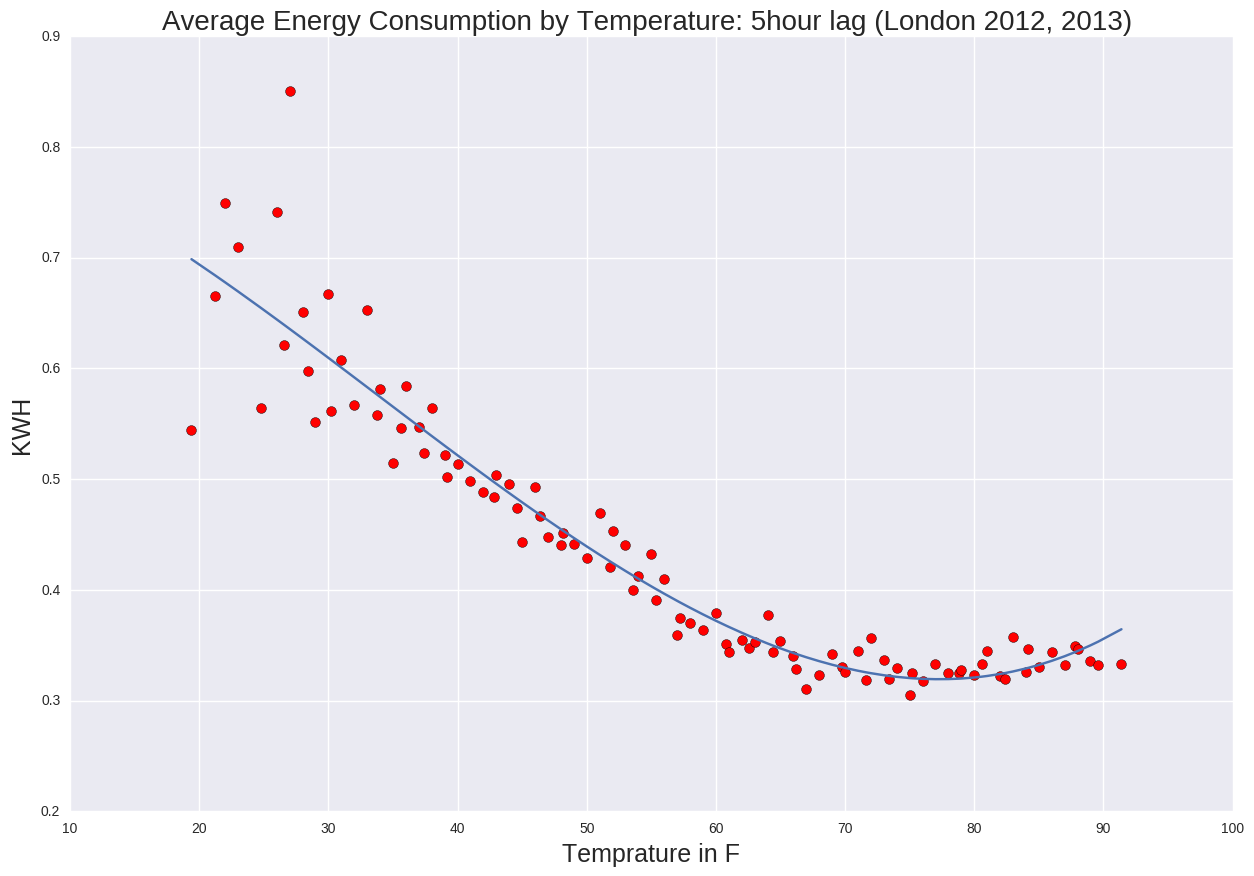

In [175]:
#Plotting the polyfit
p = np.poly1d(z)

ax1 = pl.figure(figsize=(15,10)).add_subplot(111)
lag_grp5.plot(kind='scatter', x='Temp', y='Overall', color='r',s=50, alpha=1, ax=ax1)
plt.plot(lag_grp5.Temp, p(lag_grp5.Temp))
pl.title('Average Energy Consumption by Temperature: 5hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)

# Fuck Yeh!


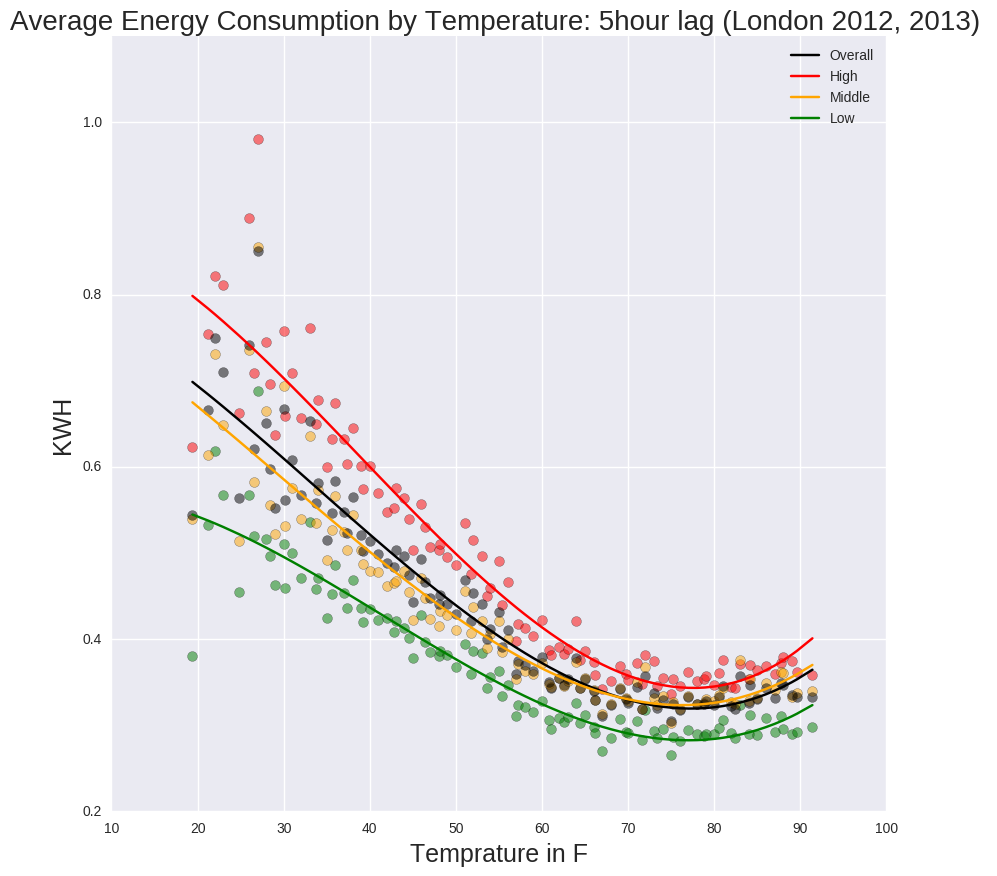

In [176]:
p1 = np.poly1d(np.polyfit(lag_grp5.Temp, lag_grp5.Overall, 3))
p2 = np.poly1d(np.polyfit(lag_grp5.Temp, lag_grp5.High, 3))
p3 = np.poly1d(np.polyfit(lag_grp5.Temp, lag_grp5.Middle, 3))
p4 = np.poly1d(np.polyfit(lag_grp5.Temp, lag_grp5.Low, 3))

ax1 = pl.figure(figsize=(10,10)).add_subplot(111)
lag_grp5.plot(kind='scatter', x='Temp', y='High', color='r',s=50, alpha=0.5, ax=ax1)
lag_grp5.plot(kind='scatter', x='Temp', y='Low', color='g',s=50, alpha=0.5, ax=ax1)
lag_grp5.plot(kind='scatter', x='Temp', y='Middle', color='orange',s=50, alpha=0.5, ax=ax1)
lag_grp5.plot(kind='scatter', x='Temp', y='Overall', color='k',s=50, alpha=0.5, ax=ax1)
plt.plot(lag_grp5.Temp, p1(lag_grp5.Temp), color = 'k', label = 'Overall')
plt.plot(lag_grp5.Temp, p2(lag_grp5.Temp), color = 'r', label = 'High')
plt.plot(lag_grp5.Temp, p3(lag_grp5.Temp), color = 'orange', label = 'Middle')
plt.plot(lag_grp5.Temp, p4(lag_grp5.Temp), color = 'g', label = 'Low')
pl.title('Average Energy Consumption by Temperature: 5hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
pl.legend()

In [177]:
# 6 hour lag
x = np.array(final1213.Temperature_F[6:])
y1 = np.array(final1213.Overall[:-6])
y2 = np.array(final1213.High_Income[:-6])
y3 = np.array(final1213.Middle_Income[:-6])
y4 = np.array(final1213.Low_Income[:-6])
timelag = pd.DataFrame()
timelag['Temp'] = x
timelag['Overall'] = y1
timelag['High'] = y2
timelag['Middle'] = y3
timelag['Low'] = y4
timelag.head()

Temp   Overall      High    Middle       Low
0  53.0  0.231749  0.268072  0.190114  0.221192
1  53.6  0.550101  0.633311  0.355447  0.616456
2  53.6  0.466764  0.570036  0.296605  0.483976
3  53.0  0.383123  0.489018  0.236228  0.375616
4  53.6  0.312892  0.376808  0.206053  0.324936

In [178]:
lag_grp6 = timelag.groupby(['Temp']).mean()
lag_grp6.reset_index(inplace=True)
lag_grp6.head()

Temp   Overall      High    Middle       Low
0  19.4  0.650762  0.712339  0.717152  0.453165
1  21.2  0.718947  0.813933  0.647419  0.590500
2  22.0  0.745666  0.851903  0.669885  0.597257
3  23.0  0.747123  0.842807  0.682826  0.618698
4  24.8  0.630368  0.737368  0.580781  0.513209

In [179]:
#fitting a poly curve
z = np.polyfit(lag_grp6.Temp, lag_grp6.Overall, 3)
z

array([  1.01740747e-06,  -4.43438069e-05,  -1.11887468e-02,
         9.72053781e-01])

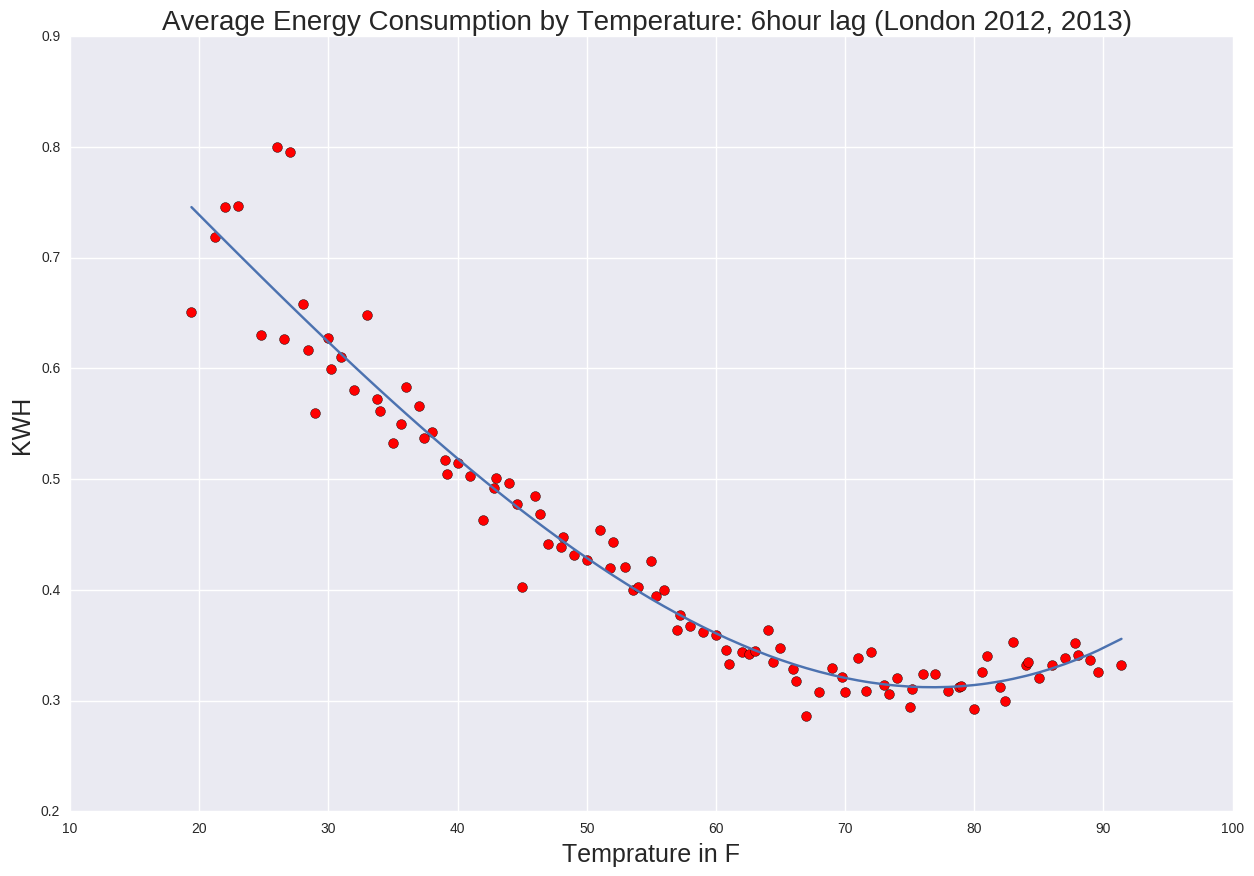

In [181]:
#Plotting the polyfit
p = np.poly1d(z)

ax1 = pl.figure(figsize=(15,10)).add_subplot(111)
lag_grp6.plot(kind='scatter', x='Temp', y='Overall', color='r',s=50, alpha=1, ax=ax1)
plt.plot(lag_grp6.Temp, p(lag_grp6.Temp))
pl.title('Average Energy Consumption by Temperature: 6hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)

# Fuck Yeh!


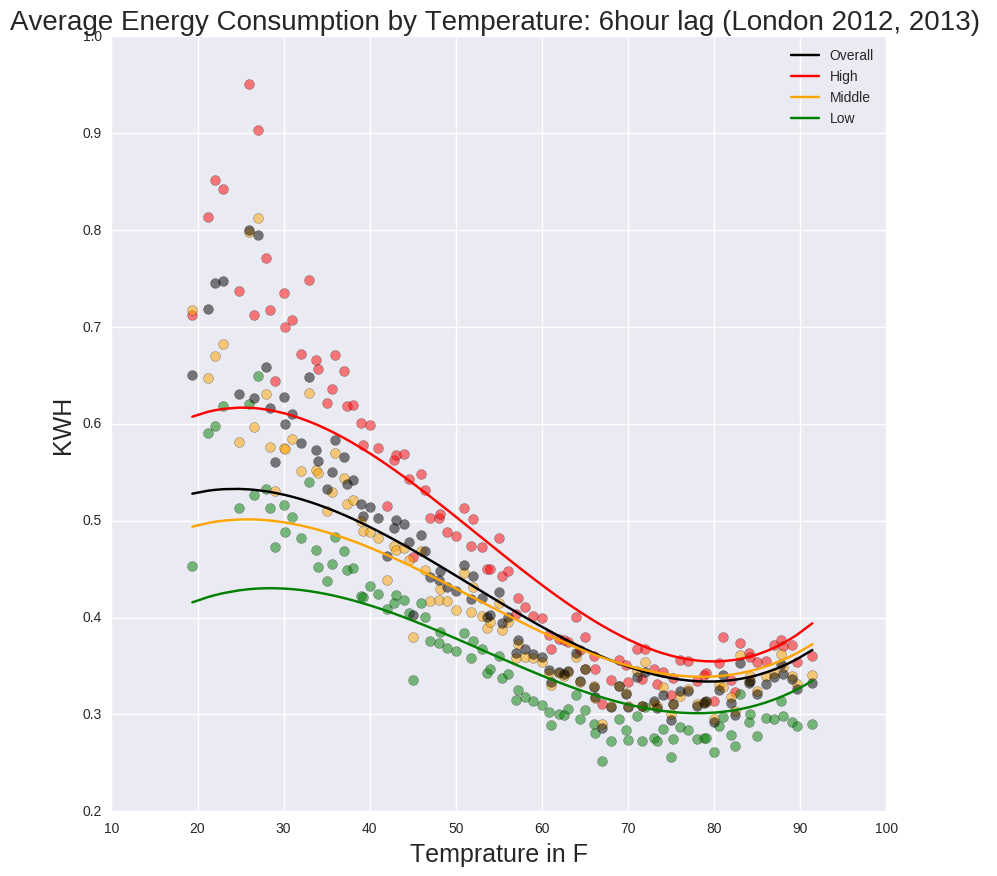

In [182]:
p1 = np.poly1d(np.polyfit(lag_grp6.Temp, lag_grp2.Overall, 3))
p2 = np.poly1d(np.polyfit(lag_grp6.Temp, lag_grp2.High, 3))
p3 = np.poly1d(np.polyfit(lag_grp6.Temp, lag_grp2.Middle, 3))
p4 = np.poly1d(np.polyfit(lag_grp6.Temp, lag_grp2.Low, 3))

ax1 = pl.figure(figsize=(10,10)).add_subplot(111)
lag_grp6.plot(kind='scatter', x='Temp', y='High', color='r',s=50, alpha=0.5, ax=ax1)
lag_grp6.plot(kind='scatter', x='Temp', y='Low', color='g',s=50, alpha=0.5, ax=ax1)
lag_grp6.plot(kind='scatter', x='Temp', y='Middle', color='orange',s=50, alpha=0.5, ax=ax1)
lag_grp6.plot(kind='scatter', x='Temp', y='Overall', color='k',s=50, alpha=0.5, ax=ax1)
plt.plot(lag_grp6.Temp, p1(lag_grp6.Temp), color = 'k', label = 'Overall')
plt.plot(lag_grp6.Temp, p2(lag_grp6.Temp), color = 'r', label = 'High')
plt.plot(lag_grp6.Temp, p3(lag_grp6.Temp), color = 'orange', label = 'Middle')
plt.plot(lag_grp6.Temp, p4(lag_grp6.Temp), color = 'g', label = 'Low')
pl.title('Average Energy Consumption by Temperature: 6hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
pl.legend()

In [183]:
# 8 hour lag
x = np.array(final1213.Temperature_F[8:])
y1 = np.array(final1213.Overall[:-8])
y2 = np.array(final1213.High_Income[:-8])
y3 = np.array(final1213.Middle_Income[:-8])
y4 = np.array(final1213.Low_Income[:-8])
timelag = pd.DataFrame()
timelag['Temp'] = x
timelag['Overall'] = y1
timelag['High'] = y2
timelag['Middle'] = y3
timelag['Low'] = y4
timelag.head()

Temp   Overall      High    Middle       Low
0  53.6  0.231749  0.268072  0.190114  0.221192
1  53.0  0.550101  0.633311  0.355447  0.616456
2  53.6  0.466764  0.570036  0.296605  0.483976
3  55.4  0.383123  0.489018  0.236228  0.375616
4  55.4  0.312892  0.376808  0.206053  0.324936

In [184]:
lag_grp8 = timelag.groupby(['Temp']).mean()
lag_grp8.reset_index(inplace=True)
lag_grp8.head()

Temp   Overall      High    Middle       Low
0  19.4  0.627178  0.724195  0.523273  0.522023
1  21.2  0.803294  0.892499  0.742560  0.674726
2  22.0  0.843474  0.934954  0.747015  0.746976
3  23.0  0.722981  0.819793  0.616903  0.636066
4  24.8  0.744449  0.862236  0.706421  0.606171

In [185]:
#fitting a poly curve
z = np.polyfit(lag_grp8.Temp, lag_grp8.Overall, 3)
z

array([  1.25864164e-06,  -8.90647619e-05,  -9.53727484e-03,
         9.75199030e-01])

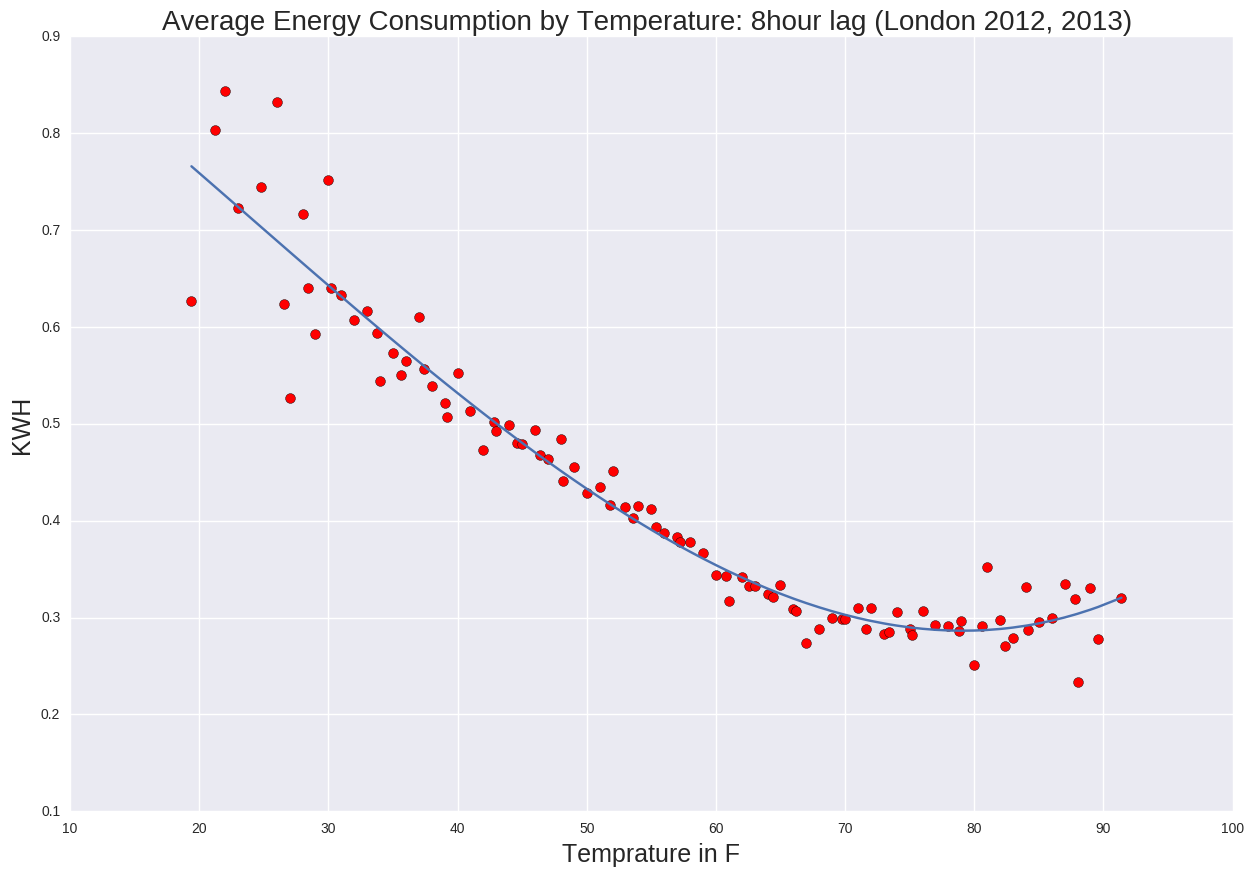

In [186]:
#Plotting the polyfit
p = np.poly1d(z)

ax1 = pl.figure(figsize=(15,10)).add_subplot(111)
lag_grp8.plot(kind='scatter', x='Temp', y='Overall', color='r',s=50, alpha=1, ax=ax1)
plt.plot(lag_grp8.Temp, p(lag_grp8.Temp))
pl.title('Average Energy Consumption by Temperature: 8hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)

# Fuck Yeh!


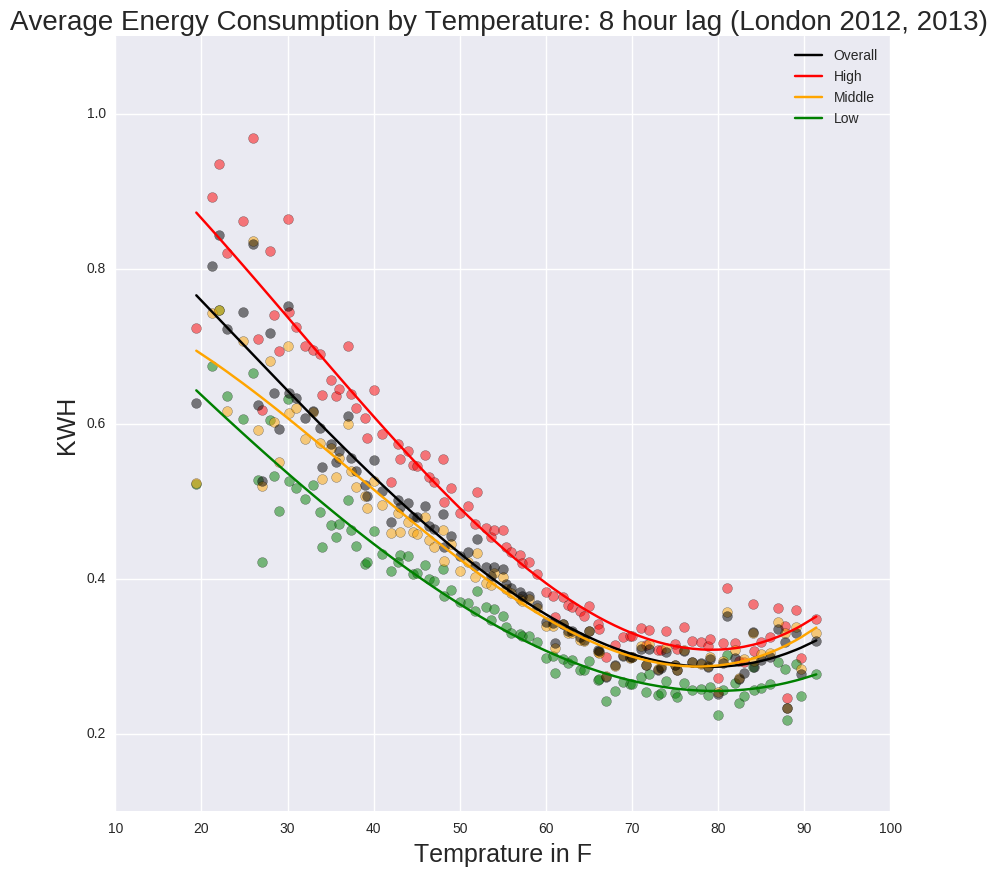

In [187]:
p1 = np.poly1d(np.polyfit(lag_grp8.Temp, lag_grp8.Overall, 3))
p2 = np.poly1d(np.polyfit(lag_grp8.Temp, lag_grp8.High, 3))
p3 = np.poly1d(np.polyfit(lag_grp8.Temp, lag_grp8.Middle, 3))
p4 = np.poly1d(np.polyfit(lag_grp8.Temp, lag_grp8.Low, 3))

ax1 = pl.figure(figsize=(10,10)).add_subplot(111)
lag_grp8.plot(kind='scatter', x='Temp', y='High', color='r',s=50, alpha=0.5, ax=ax1)
lag_grp8.plot(kind='scatter', x='Temp', y='Low', color='g',s=50, alpha=0.5, ax=ax1)
lag_grp8.plot(kind='scatter', x='Temp', y='Middle', color='orange',s=50, alpha=0.5, ax=ax1)
lag_grp8.plot(kind='scatter', x='Temp', y='Overall', color='k',s=50, alpha=0.5, ax=ax1)
plt.plot(lag_grp8.Temp, p1(lag_grp8.Temp), color = 'k', label = 'Overall')
plt.plot(lag_grp8.Temp, p2(lag_grp8.Temp), color = 'r', label = 'High')
plt.plot(lag_grp8.Temp, p3(lag_grp8.Temp), color = 'orange', label = 'Middle')
plt.plot(lag_grp8.Temp, p4(lag_grp8.Temp), color = 'g', label = 'Low')
pl.title('Average Energy Consumption by Temperature: 8 hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
pl.legend()

In [188]:
# 12 hour lag
x = np.array(final1213.Temperature_F[12:])
y1 = np.array(final1213.Overall[:-12])
y2 = np.array(final1213.High_Income[:-12])
y3 = np.array(final1213.Middle_Income[:-12])
y4 = np.array(final1213.Low_Income[:-12])
timelag = pd.DataFrame()
timelag['Temp'] = x
timelag['Overall'] = y1
timelag['High'] = y2
timelag['Middle'] = y3
timelag['Low'] = y4
timelag.head()

Temp   Overall      High    Middle       Low
0  55.4  0.231749  0.268072  0.190114  0.221192
1  53.6  0.550101  0.633311  0.355447  0.616456
2  53.6  0.466764  0.570036  0.296605  0.483976
3  51.8  0.383123  0.489018  0.236228  0.375616
4  50.0  0.312892  0.376808  0.206053  0.324936

In [189]:
lag_grp12 = timelag.groupby(['Temp']).mean()
lag_grp12.reset_index(inplace=True)
lag_grp12.head()

Temp   Overall      High    Middle       Low
0  19.4  0.892894  0.984261  0.829367  0.760344
1  21.2  0.690887  0.746716  0.627772  0.637144
2  22.0  0.653616  0.686364  0.593565  0.645744
3  23.0  0.695573  0.780336  0.598604  0.622802
4  24.8  0.695479  0.790695  0.659101  0.590115

In [216]:
#fitting a poly curve
z = np.polyfit(lag_grp12.Temp, lag_grp12.Overall, 1)
z

array([-0.00685156,  0.7925961 ])

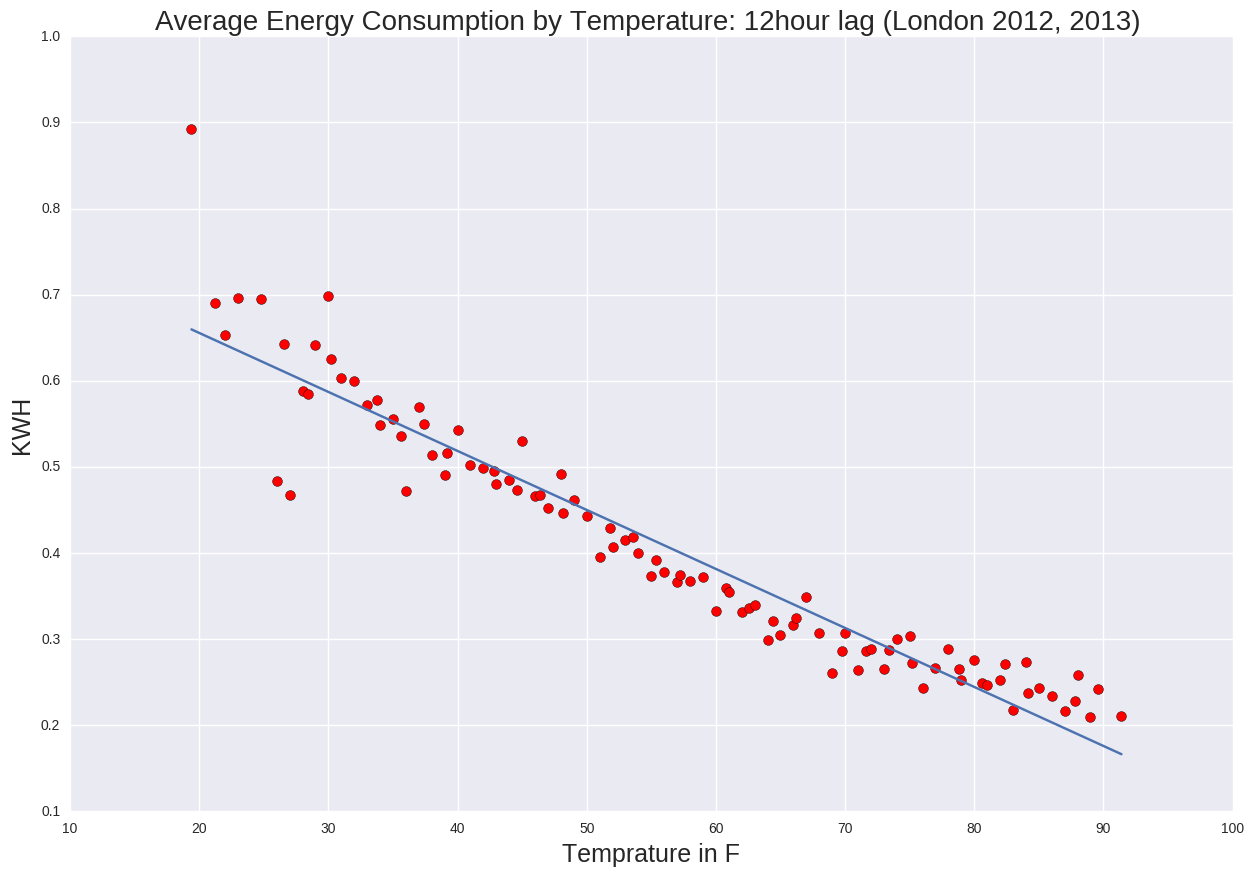

In [217]:
#Plotting the polyfit
p = np.poly1d(z)

ax1 = pl.figure(figsize=(15,10)).add_subplot(111)
lag_grp12.plot(kind='scatter', x='Temp', y='Overall', color='r',s=50, alpha=1, ax=ax1)
plt.plot(lag_grp12.Temp, p(lag_grp12.Temp))
pl.title('Average Energy Consumption by Temperature: 12hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)

# Fuck Yeh!


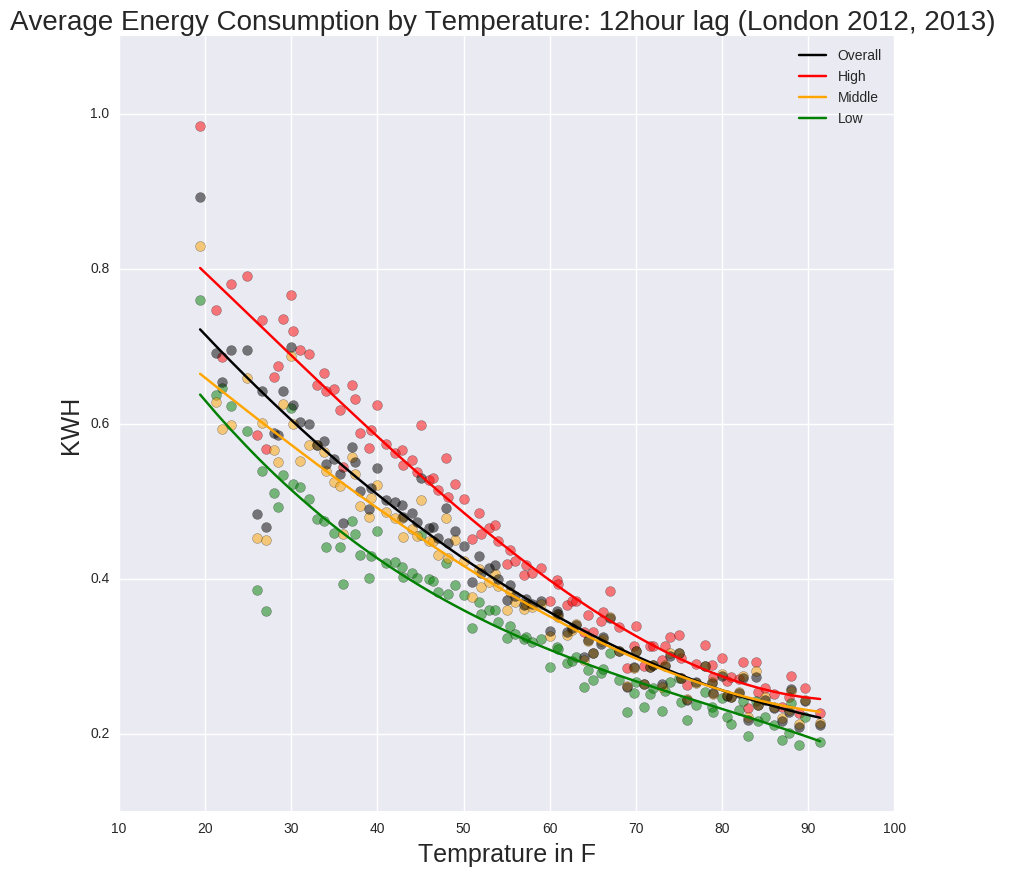

In [192]:
p1 = np.poly1d(np.polyfit(lag_grp2.Temp, lag_grp12.Overall, 3))
p2 = np.poly1d(np.polyfit(lag_grp2.Temp, lag_grp12.High, 3))
p3 = np.poly1d(np.polyfit(lag_grp2.Temp, lag_grp12.Middle, 3))
p4 = np.poly1d(np.polyfit(lag_grp2.Temp, lag_grp12.Low, 3))

ax1 = pl.figure(figsize=(10,10)).add_subplot(111)
lag_grp12.plot(kind='scatter', x='Temp', y='High', color='r',s=50, alpha=0.5, ax=ax1)
lag_grp12.plot(kind='scatter', x='Temp', y='Low', color='g',s=50, alpha=0.5, ax=ax1)
lag_grp12.plot(kind='scatter', x='Temp', y='Middle', color='orange',s=50, alpha=0.5, ax=ax1)
lag_grp12.plot(kind='scatter', x='Temp', y='Overall', color='k',s=50, alpha=0.5, ax=ax1)
plt.plot(lag_grp12.Temp, p1(lag_grp12.Temp), color = 'k', label = 'Overall')
plt.plot(lag_grp12.Temp, p2(lag_grp12.Temp), color = 'r', label = 'High')
plt.plot(lag_grp12.Temp, p3(lag_grp12.Temp), color = 'orange', label = 'Middle')
plt.plot(lag_grp12.Temp, p4(lag_grp12.Temp), color = 'g', label = 'Low')
pl.title('Average Energy Consumption by Temperature: 12hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
pl.legend()

In [193]:
# 24 hour lag
x = np.array(final1213.Temperature_F[24:])
y1 = np.array(final1213.Overall[:-24])
y2 = np.array(final1213.High_Income[:-24])
y3 = np.array(final1213.Middle_Income[:-24])
y4 = np.array(final1213.Low_Income[:-24])
timelag = pd.DataFrame()
timelag['Temp'] = x
timelag['Overall'] = y1
timelag['High'] = y2
timelag['Middle'] = y3
timelag['Low'] = y4
timelag.head()

Temp   Overall      High    Middle       Low
0  44.6  0.231749  0.268072  0.190114  0.221192
1  44.6  0.550101  0.633311  0.355447  0.616456
2  44.6  0.466764  0.570036  0.296605  0.483976
3  42.8  0.383123  0.489018  0.236228  0.375616
4  41.0  0.312892  0.376808  0.206053  0.324936

In [194]:
lag_grp24 = timelag.groupby(['Temp']).mean()
lag_grp24.reset_index(inplace=True)
lag_grp24.head()

Temp   Overall      High    Middle       Low
0  19.4  0.558412  0.620291  0.521177  0.466970
1  21.2  0.496448  0.564532  0.463482  0.389989
2  22.0  0.471866  0.545315  0.419502  0.372557
3  23.0  0.556340  0.621694  0.538483  0.447519
4  24.8  0.424595  0.496650  0.387775  0.348455

In [195]:
#fitting a poly curve
z = np.polyfit(lag_grp24.Temp, lag_grp24.Overall, 3)
z

array([  1.77161429e-06,  -2.74664915e-04,   1.04209910e-02,
         3.71733320e-01])

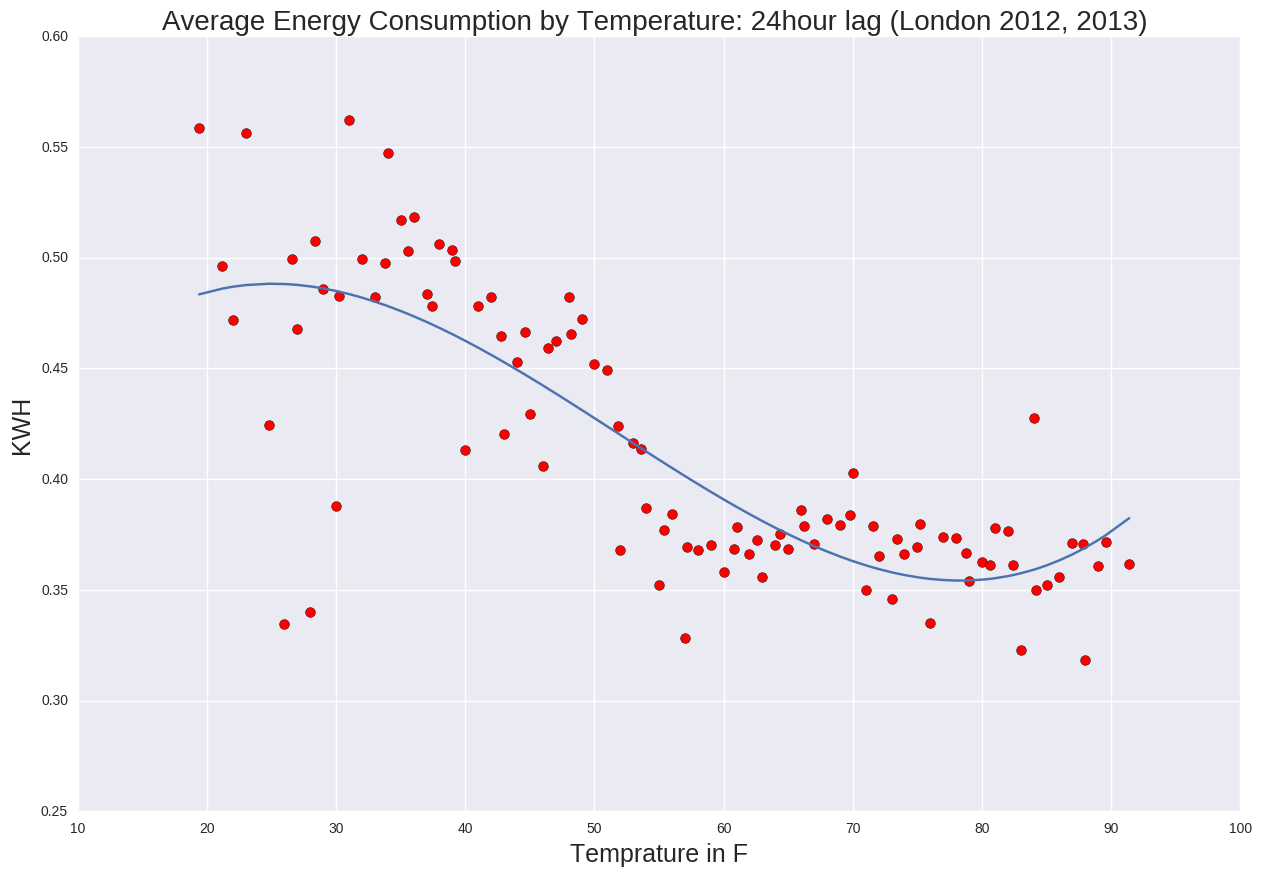

In [196]:
#Plotting the polyfit
p = np.poly1d(z)

ax1 = pl.figure(figsize=(15,10)).add_subplot(111)
lag_grp24.plot(kind='scatter', x='Temp', y='Overall', color='r',s=50, alpha=1, ax=ax1)
plt.plot(lag_grp24.Temp, p(lag_grp24.Temp))
pl.title('Average Energy Consumption by Temperature: 24hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)

# Fuck Yeh!


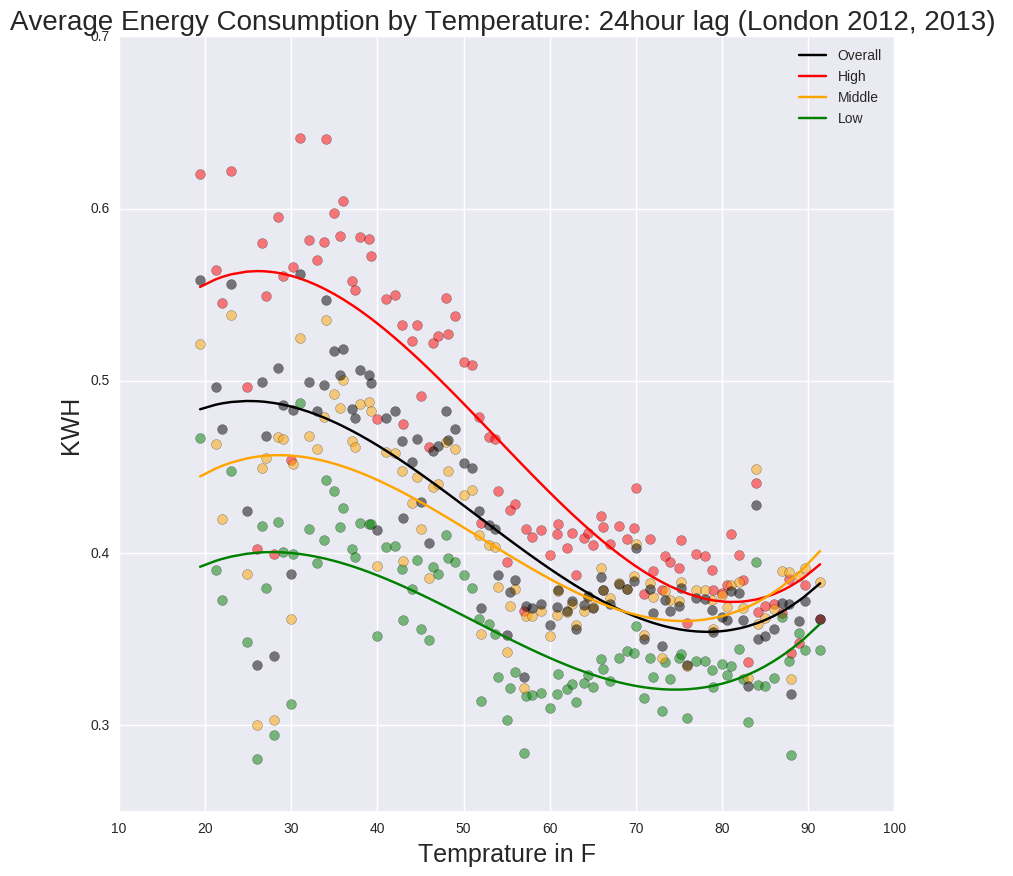

In [197]:
p1 = np.poly1d(np.polyfit(lag_grp2.Temp, lag_grp24.Overall, 3))
p2 = np.poly1d(np.polyfit(lag_grp2.Temp, lag_grp24.High, 3))
p3 = np.poly1d(np.polyfit(lag_grp2.Temp, lag_grp24.Middle, 3))
p4 = np.poly1d(np.polyfit(lag_grp2.Temp, lag_grp24.Low, 3))

ax1 = pl.figure(figsize=(10,10)).add_subplot(111)
lag_grp24.plot(kind='scatter', x='Temp', y='High', color='r',s=50, alpha=0.5, ax=ax1)
lag_grp24.plot(kind='scatter', x='Temp', y='Low', color='g',s=50, alpha=0.5, ax=ax1)
lag_grp24.plot(kind='scatter', x='Temp', y='Middle', color='orange',s=50, alpha=0.5, ax=ax1)
lag_grp24.plot(kind='scatter', x='Temp', y='Overall', color='k',s=50, alpha=0.5, ax=ax1)
plt.plot(lag_grp24.Temp, p1(lag_grp24.Temp), color = 'k', label = 'Overall')
plt.plot(lag_grp24.Temp, p2(lag_grp24.Temp), color = 'r', label = 'High')
plt.plot(lag_grp24.Temp, p3(lag_grp24.Temp), color = 'orange', label = 'Middle')
plt.plot(lag_grp24.Temp, p4(lag_grp24.Temp), color = 'g', label = 'Low')
pl.title('Average Energy Consumption by Temperature: 24hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
pl.legend()

In [198]:
# 18 hour lag
x = np.array(final1213.Temperature_F[18:])
y1 = np.array(final1213.Overall[:-18])
y2 = np.array(final1213.High_Income[:-18])
y3 = np.array(final1213.Middle_Income[:-18])
y4 = np.array(final1213.Low_Income[:-18])
timelag = pd.DataFrame()
timelag['Temp'] = x
timelag['Overall'] = y1
timelag['High'] = y2
timelag['Middle'] = y3
timelag['Low'] = y4
timelag.head()

Temp   Overall      High    Middle       Low
0  50.0  0.231749  0.268072  0.190114  0.221192
1  50.0  0.550101  0.633311  0.355447  0.616456
2  50.0  0.466764  0.570036  0.296605  0.483976
3  50.0  0.383123  0.489018  0.236228  0.375616
4  48.2  0.312892  0.376808  0.206053  0.324936

In [199]:
lag_grp18 = timelag.groupby(['Temp']).mean()
lag_grp18.reset_index(inplace=True)
lag_grp18.head()

Temp   Overall      High    Middle       Low
0  19.4  0.563068  0.598878  0.504067  0.545257
1  21.2  0.570647  0.617901  0.511786  0.531347
2  22.0  0.572431  0.638241  0.502113  0.506158
3  23.0  0.546433  0.618164  0.472510  0.477434
4  24.8  0.535234  0.619067  0.499596  0.449886

In [212]:
#fitting a poly curve
z = np.polyfit(lag_grp18.Temp, lag_grp18.Overall, 1)
z

array([-0.00199562,  0.54292794])

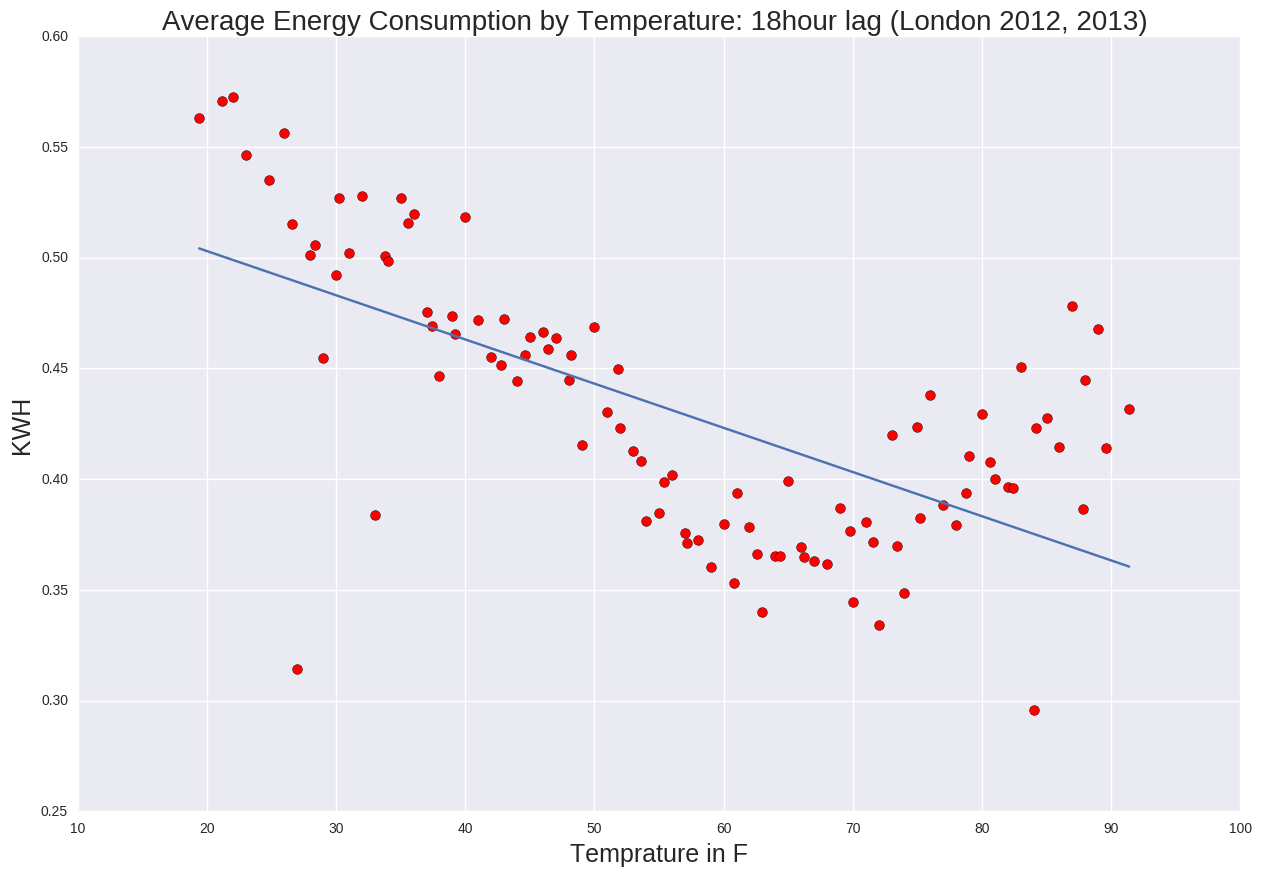

In [213]:
#Plotting the polyfit
p = np.poly1d(z)

ax1 = pl.figure(figsize=(15,10)).add_subplot(111)
lag_grp18.plot(kind='scatter', x='Temp', y='Overall', color='r',s=50, alpha=1, ax=ax1)
plt.plot(lag_grp18.Temp, p(lag_grp18.Temp))
pl.title('Average Energy Consumption by Temperature: 18hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)

# Fuck Yeh!


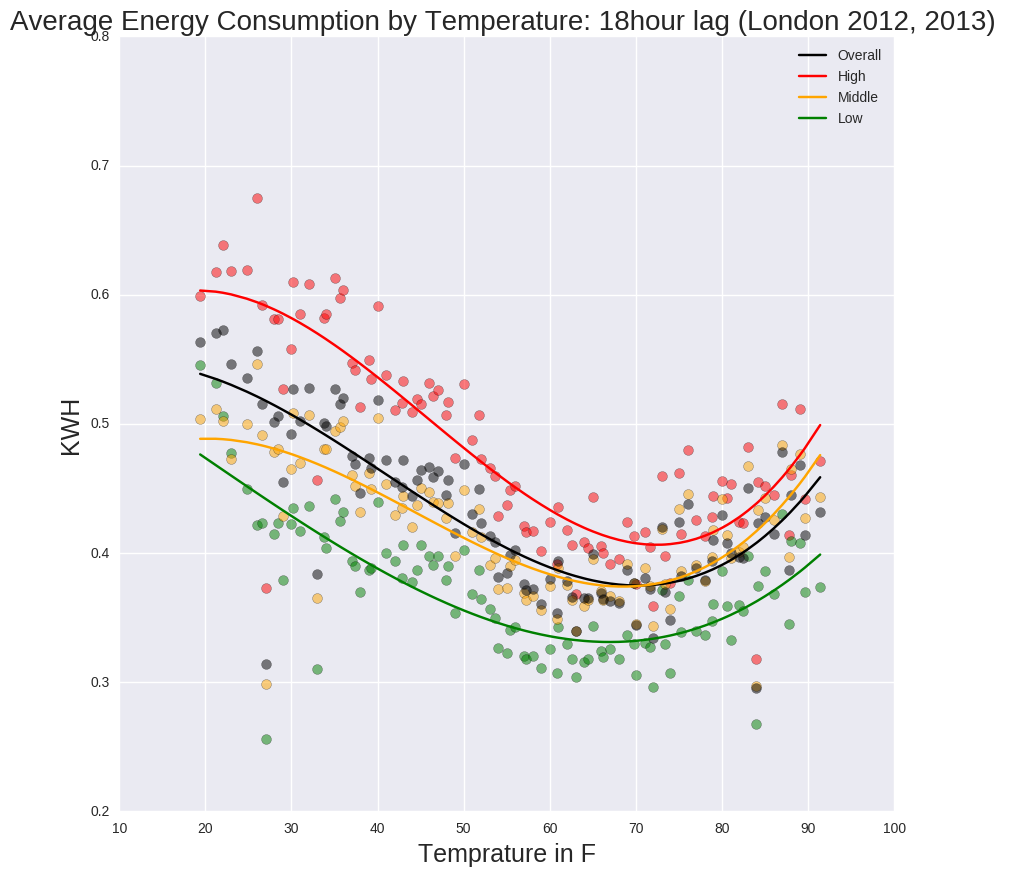

In [202]:
p1 = np.poly1d(np.polyfit(lag_grp18.Temp, lag_grp18.Overall, 3))
p2 = np.poly1d(np.polyfit(lag_grp18.Temp, lag_grp18.High, 3))
p3 = np.poly1d(np.polyfit(lag_grp18.Temp, lag_grp18.Middle, 3))
p4 = np.poly1d(np.polyfit(lag_grp18.Temp, lag_grp18.Low, 3))

ax1 = pl.figure(figsize=(10,10)).add_subplot(111)
lag_grp18.plot(kind='scatter', x='Temp', y='High', color='r',s=50, alpha=0.5, ax=ax1)
lag_grp18.plot(kind='scatter', x='Temp', y='Low', color='g',s=50, alpha=0.5, ax=ax1)
lag_grp18.plot(kind='scatter', x='Temp', y='Middle', color='orange',s=50, alpha=0.5, ax=ax1)
lag_grp18.plot(kind='scatter', x='Temp', y='Overall', color='k',s=50, alpha=0.5, ax=ax1)
plt.plot(lag_grp18.Temp, p1(lag_grp18.Temp), color = 'k', label = 'Overall')
plt.plot(lag_grp18.Temp, p2(lag_grp18.Temp), color = 'r', label = 'High')
plt.plot(lag_grp18.Temp, p3(lag_grp18.Temp), color = 'orange', label = 'Middle')
plt.plot(lag_grp18.Temp, p4(lag_grp18.Temp), color = 'g', label = 'Low')
pl.title('Average Energy Consumption by Temperature: 18hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
pl.legend()

In [203]:
# 15 hour lag
x = np.array(final1213.Temperature_F[15:])
y1 = np.array(final1213.Overall[:-15])
y2 = np.array(final1213.High_Income[:-15])
y3 = np.array(final1213.Middle_Income[:-15])
y4 = np.array(final1213.Low_Income[:-15])
timelag = pd.DataFrame()
timelag['Temp'] = x
timelag['Overall'] = y1
timelag['High'] = y2
timelag['Middle'] = y3
timelag['Low'] = y4
timelag.head()

Temp   Overall      High    Middle       Low
0  51.8  0.231749  0.268072  0.190114  0.221192
1  50.0  0.550101  0.633311  0.355447  0.616456
2  50.0  0.466764  0.570036  0.296605  0.483976
3  50.0  0.383123  0.489018  0.236228  0.375616
4  50.0  0.312892  0.376808  0.206053  0.324936

In [204]:
lag_grp15 = timelag.groupby(['Temp']).mean()
lag_grp15.reset_index(inplace=True)
lag_grp15.head()

Temp   Overall      High    Middle       Low
0  19.4  0.588154  0.613203  0.526524  0.595497
1  21.2  0.600700  0.639656  0.555251  0.564804
2  22.0  0.574044  0.622577  0.503918  0.544205
3  23.0  0.571866  0.632335  0.505503  0.517296
4  24.8  0.583401  0.661907  0.550402  0.500255

In [205]:
#fitting a poly curve
z = np.polyfit(lag_grp2.Temp, lag_grp15.Overall, 3)
z

array([  1.53381606e-06,  -2.09138878e-04,   3.40782572e-03,
         5.92784869e-01])

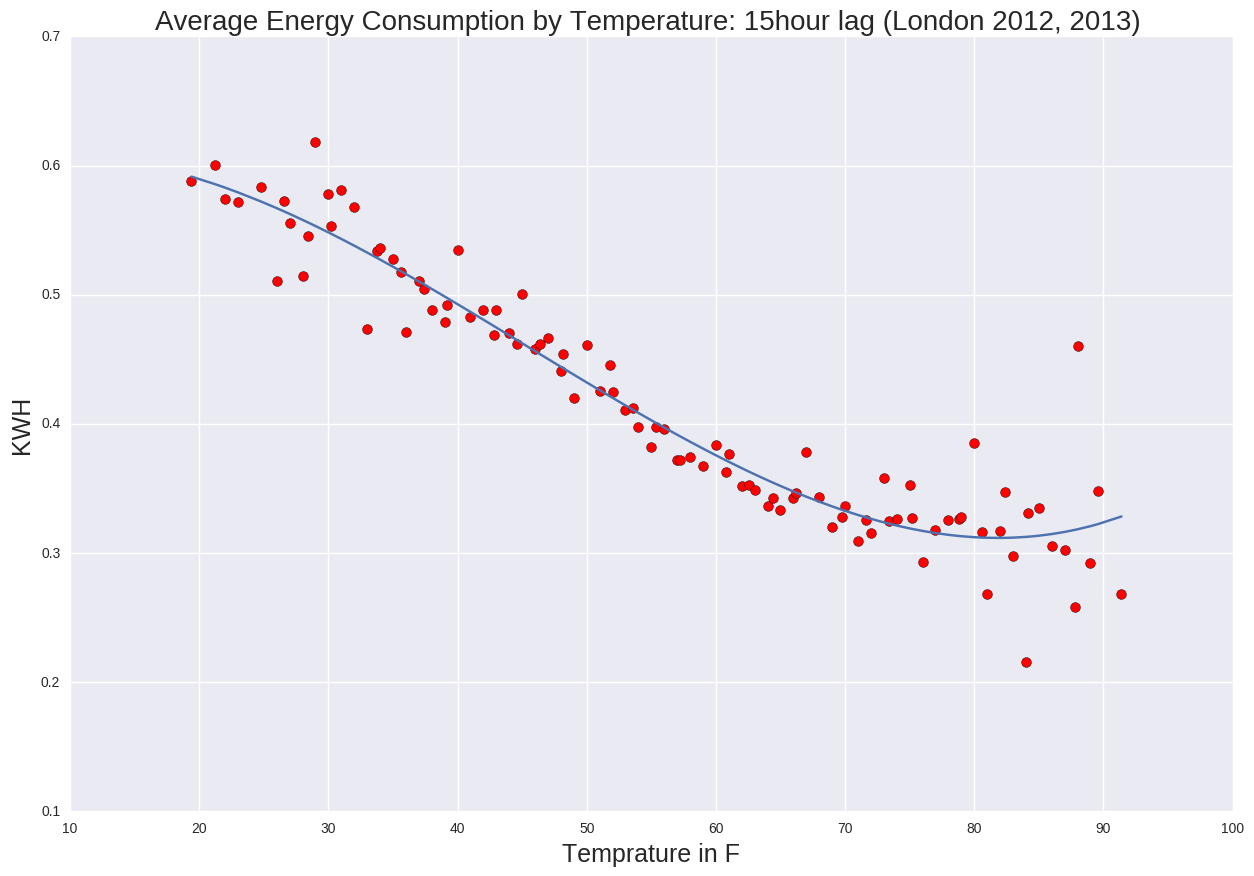

In [206]:
#Plotting the polyfit
p = np.poly1d(z)

ax1 = pl.figure(figsize=(15,10)).add_subplot(111)
lag_grp15.plot(kind='scatter', x='Temp', y='Overall', color='r',s=50, alpha=1, ax=ax1)
plt.plot(lag_grp15.Temp, p(lag_grp15.Temp))
pl.title('Average Energy Consumption by Temperature: 15hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)

# Fuck Yeh!


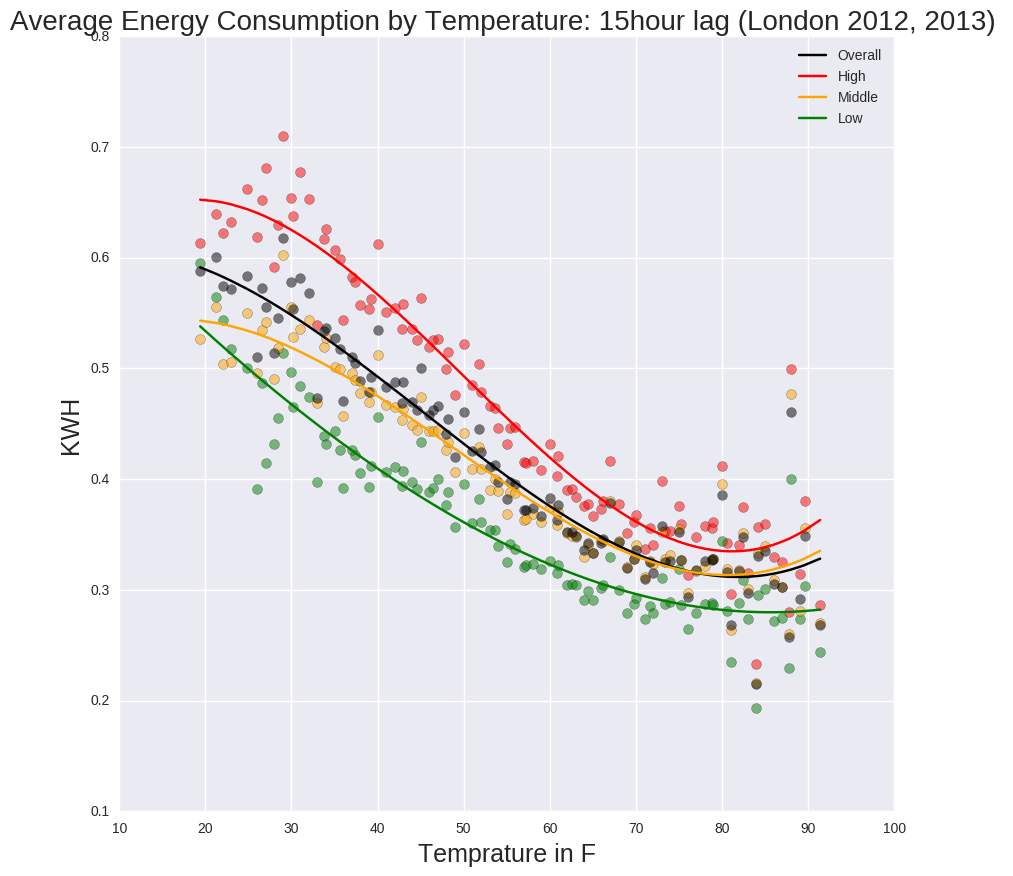

In [207]:
p1 = np.poly1d(np.polyfit(lag_grp15.Temp, lag_grp15.Overall, 3))
p2 = np.poly1d(np.polyfit(lag_grp15.Temp, lag_grp15.High, 3))
p3 = np.poly1d(np.polyfit(lag_grp15.Temp, lag_grp15.Middle, 3))
p4 = np.poly1d(np.polyfit(lag_grp15.Temp, lag_grp15.Low, 3))

ax1 = pl.figure(figsize=(10,10)).add_subplot(111)
lag_grp15.plot(kind='scatter', x='Temp', y='High', color='r',s=50, alpha=0.5, ax=ax1)
lag_grp15.plot(kind='scatter', x='Temp', y='Low', color='g',s=50, alpha=0.5, ax=ax1)
lag_grp15.plot(kind='scatter', x='Temp', y='Middle', color='orange',s=50, alpha=0.5, ax=ax1)
lag_grp15.plot(kind='scatter', x='Temp', y='Overall', color='k',s=50, alpha=0.5, ax=ax1)
plt.plot(lag_grp15.Temp, p1(lag_grp15.Temp), color = 'k', label = 'Overall')
plt.plot(lag_grp15.Temp, p2(lag_grp15.Temp), color = 'r', label = 'High')
plt.plot(lag_grp15.Temp, p3(lag_grp15.Temp), color = 'orange', label = 'Middle')
plt.plot(lag_grp15.Temp, p4(lag_grp15.Temp), color = 'g', label = 'Low')
pl.title('Average Energy Consumption by Temperature: 15hour lag (London 2012, 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
pl.legend()